#### ÎÖ∏ÏÑ†#23050000Î°ú EDA

In [1]:
import warnings
import matplotlib.pyplot as plt
from dateutil import parser
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# when Tap key is not working...
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('./train_rev.csv', index_col=[0])
df.tail()

id        date  bus_route_id in_out  station_code  station_name  \
415418  415418  2019-09-30      32820000     ÏãúÎÇ¥          1129  ÌïúÎ¶ºÌôòÏäπÏ†ïÎ•òÏû•(ÌïúÎ¶ºÎ¶¨)   
415419  415419  2019-09-30      32820000     ÏãúÎÇ¥          1564     Ï†úÏ£ºÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê   
415420  415420  2019-09-30      32820000     ÏãúÎÇ¥          2322          Ìï¥Î≥ëÎ∂ÄÎåÄ   
415421  415421  2019-09-30      32820000     ÏãúÎÇ¥          3291  Ïï†ÏõîÌôòÏäπÏ†ïÎ•òÏû•(Ïï†ÏõîÎ¶¨)   
415422  415422  2019-09-30      32820000     ÏãúÎÇ¥       6115100    ÏÑúÍ∑ÄÌè¨ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê   

        latitude  longitude  6~7_ride  7~8_ride  ...  10~11_ride  11~12_ride  \
415418  33.41437  126.26336       4.0       0.0  ...         0.0         0.0   
415419  33.49946  126.51479       4.0       0.0  ...         0.0         0.0   
415420  33.23100  126.26273       0.0       0.0  ...         0.0         0.0   
415421  33.46483  126.31870       1.0       0.0  ...         0.0         0.0   
415422  33.24873  126.50799       0.0       0.0  ...         0.0         0.0   

        6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  10~11_takeoff  \
415418          0.0          0.0          0.0           0.0            0.0   
415419          0.0          0.0          0.0           0.0            0.0   
415420          0.0          1.0          0.0           0.0            0.0   
415421          0.0          0.0          0.0           0.0            0.0   
415422          0.0          0.0          4.0           0.0            0.0   

        11~12_takeoff  18~20_ride     day  
415418            0.0         0.0  Monday  
415419            0.0         0.0  Monday  
415420            0.0         0.0  Monday  
415421            0.0         0.0  Monday  
415422            0.0         0.0  Monday  

[5 rows x 22 columns]

#### ÏÉàÎ≤ΩÏóê Ï∂úÍ∑º/Ìá¥Í∑ºÌïòÎäî Ìå®ÌÑ¥ÏùÑ ÏÇ¥Ìé¥Î≥¥Ïûê

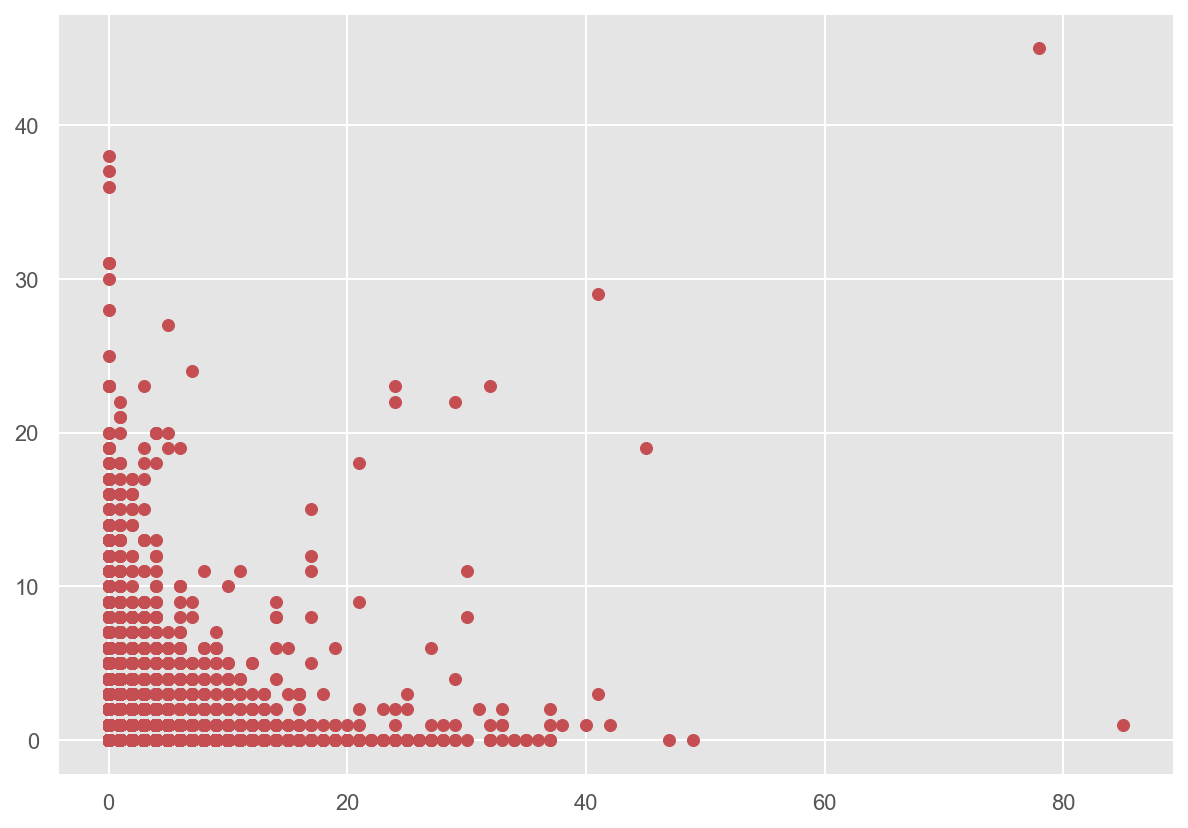

In [4]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])
plt.figure(figsize=(10,7))
plt.scatter(df['6~7_ride'], df['6~7_takeoff'], color='r')

#### 80Î™Ö Ïù¥ÏÉÅ ÏäπÏ∞®, 10Î™Ö Ïù¥Ìïò ÌïòÏ∞®Î•º ÌïòÎäî Ï†Ä Ïó≠ÏùÄ ÎåÄÏ≤¥ Ïñ¥Îîî?

In [5]:
pd.set_option('display.max_columns', 22)
df[df['6~7_ride']==np.max(df['6~7_ride'])]
# Ï†ú6Î∂ÄÎëê, ÏÉàÎ≤ΩÏóê Ìá¥Í∑ºÌïòÎäî Í∑ºÎ°úÏûêÎì§Ïù¥ ÏäπÏ∞®Î•º ÎßéÏù¥ ÌïúÍ≤ÉÏù¥ ÏïÑÎãêÍπå Ï∂îÏ∏°. 

id        date  bus_route_id in_out  station_code station_name  \
158156  158156  2019-09-12      23050000     ÏãúÎÇ¥          3112         Ï†ú6Î∂ÄÎëê   

        latitude  longitude  6~7_ride  7~8_ride  8~9_ride  9~10_ride  \
158156   33.5224  126.54445      85.0       0.0       0.0        0.0   

        10~11_ride  11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
158156         0.0         0.0          1.0          0.0          0.0   

        9~10_takeoff  10~11_takeoff  11~12_takeoff  18~20_ride       day  
158156           0.0            0.0            0.0         0.0  Thursday

In [6]:
# 9Ïõî 12Ïùº 23050000ÎÖ∏ÏÑ†Ïùò Ïö¥ÌñâÏùºÏßÄ
# hypothesis: Ïù¥ ÎÖ∏ÏÑ†ÏùÄ Ïó¨Îü¨ Î≤àÌò∏Ïùò nÎåÄÏùò Ï∞®ÎüâÏù¥ Ïö¥Ìñâ
# ÏãúÎÇ¥ - Q. Ìïú ÎÖ∏ÏÑ†ÏïàÏóêÏÑú ÏãúÎÇ¥&ÏãúÏô∏Î•º Ïò§Í∞ÄÎäî Î≤ÑÏä§ÎèÑ ÏûàÎÇò?
route_1 = df[(df['bus_route_id']==23050000) & (df['date']=='2019-09-12')].reset_index()
route_1

index      id        date  bus_route_id in_out  station_code  \
0   158107  158107  2019-09-12      23050000     ÏãúÎÇ¥             1   
1   158108  158108  2019-09-12      23050000     ÏãúÎÇ¥             3   
2   158109  158109  2019-09-12      23050000     ÏãúÎÇ¥             5   
3   158110  158110  2019-09-12      23050000     ÏãúÎÇ¥            10   
4   158111  158111  2019-09-12      23050000     ÏãúÎÇ¥            28   
5   158112  158112  2019-09-12      23050000     ÏãúÎÇ¥            32   
6   158113  158113  2019-09-12      23050000     ÏãúÎÇ¥            36   
7   158114  158114  2019-09-12      23050000     ÏãúÎÇ¥            37   
8   158115  158115  2019-09-12      23050000     ÏãúÎÇ¥            39   
9   158116  158116  2019-09-12      23050000     ÏãúÎÇ¥            43   
10  158117  158117  2019-09-12      23050000     ÏãúÎÇ¥            49   
11  158118  158118  2019-09-12      23050000     ÏãúÎÇ¥            61   
12  158119  158119  2019-09-12      23050000     ÏãúÎÇ¥            98   
13  158120  158120  2019-09-12      23050000     ÏãúÎÇ¥           100   
14  158121  158121  2019-09-12      23050000     ÏãúÎÇ¥           109   
15  158122  158122  2019-09-12      23050000     ÏãúÎÇ¥           110   
16  158123  158123  2019-09-12      23050000     ÏãúÎÇ¥           147   
17  158124  158124  2019-09-12      23050000     ÏãúÎÇ¥           150   
18  158125  158125  2019-09-12      23050000     ÏãúÎÇ¥           152   
19  158126  158126  2019-09-12      23050000     ÏãúÎÇ¥           164   
20  158127  158127  2019-09-12      23050000     ÏãúÎÇ¥           167   
21  158128  158128  2019-09-12      23050000     ÏãúÎÇ¥           170   
22  158129  158129  2019-09-12      23050000     ÏãúÎÇ¥           187   
23  158130  158130  2019-09-12      23050000     ÏãúÎÇ¥           189   
24  158131  158131  2019-09-12      23050000     ÏãúÎÇ¥           218   
25  158132  158132  2019-09-12      23050000     ÏãúÎÇ¥           269   
26  158133  158133  2019-09-12      23050000     ÏãúÎÇ¥           272   
27  158134  158134  2019-09-12      23050000     ÏãúÎÇ¥           279   
28  158135  158135  2019-09-12      23050000     ÏãúÎÇ¥           281   
29  158136  158136  2019-09-12      23050000     ÏãúÎÇ¥           286   
30  158137  158137  2019-09-12      23050000     ÏãúÎÇ¥           301   
31  158138  158138  2019-09-12      23050000     ÏãúÎÇ¥           303   
32  158139  158139  2019-09-12      23050000     ÏãúÎÇ¥           307   
33  158140  158140  2019-09-12      23050000     ÏãúÎÇ¥           318   
34  158141  158141  2019-09-12      23050000     ÏãúÎÇ¥           321   
35  158142  158142  2019-09-12      23050000     ÏãúÎÇ¥           325   
36  158143  158143  2019-09-12      23050000     ÏãúÎÇ¥           392   
37  158144  158144  2019-09-12      23050000     ÏãúÎÇ¥           575   
38  158145  158145  2019-09-12      23050000     ÏãúÎÇ¥           577   
39  158146  158146  2019-09-12      23050000     ÏãúÎÇ¥           603   
40  158147  158147  2019-09-12      23050000     ÏãúÎÇ¥           626   
41  158148  158148  2019-09-12      23050000     ÏãúÎÇ¥           629   
42  158149  158149  2019-09-12      23050000     ÏãúÎÇ¥           639   
43  158150  158150  2019-09-12      23050000     ÏãúÎÇ¥           641   
44  158151  158151  2019-09-12      23050000     ÏãúÎÇ¥          1355   
45  158152  158152  2019-09-12      23050000     ÏãúÎÇ¥          1444   
46  158153  158153  2019-09-12      23050000     ÏãúÎÇ¥          1463   
47  158154  158154  2019-09-12      23050000     ÏãúÎÇ¥          2956   
48  158155  158155  2019-09-12      23050000     ÏãúÎÇ¥          2977   
49  158156  158156  2019-09-12      23050000     ÏãúÎÇ¥          3112   
50  158157  158157  2019-09-12      23050000     ÏãúÎÇ¥          3347   
51  158158  158158  2019-09-12      23050000     ÏãúÎÇ¥          4011   

     station_name  latitude  longitude  6~7_ride  7~8_ride  ...  9~10_ride  \
0        Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê  33.52438  126.54433       

In [14]:
df.pivot_table(index=['bus_route_id', 'date'], aggfunc=[len])

len                                         \
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
bus_route_id date                                                           
4270000      2019-09-01       25.0          25.0       25.0          25.0   
             2019-09-02       26.0          26.0       26.0          26.0   
             2019-09-03       28.0          28.0       28.0          28.0   
             2019-09-04       27.0          27.0       27.0          27.0   
             2019-09-05       25.0          25.0       25.0          25.0   
...                            ...           ...        ...           ...   
32820000     2019-09-26        8.0           8.0        8.0           8.0   
             2019-09-27        8.0           8.0        8.0           8.0   
             2019-09-28        6.0           6.0        6.0           6.0   
             2019-09-29        2.0           2.0        2.0           2.0   
             2019-09-30        9.0           9.0        9.0           9.0   

                                                                              \
                        18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
bus_route_id date                                                              
4270000      2019-09-01       25.0     25.0        25.0     25.0        25.0   
             2019-09-02       26.0     26.0        26.0     26.0        26.0   
             2019-09-03       28.0     28.0        28.0     28.0        28.0   
             2019-09-04       27.0     27.0        27.0     27.0        27.0   
             2019-09-05       25.0     25.0        25.0     25.0        25.0   
...                            ...      ...         ...      ...         ...   
32820000     2019-09-26        8.0      8.0         8.0      8.0         8.0   
             2019-09-27        8.0      8.0         8.0      8.0         8.0   
             2019-09-28        6.0      6.0         6.0      6.0         6.0   
             2019-09-29        2.0      2.0         2.0      2.0         2.0   
             2019-09-30        9.0      9.0         9.0      9.0         9.0   

                                                                             \
                        8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id   
bus_route_id date                                                             
4270000      2019-09-01     25.0        25.0      25.0         25.0  25  25   
             2019-09-02     26.0        26.0      26.0         26.0  26  26   
             2019-09-03     28.0        28.0      28.0         28.0  28  28   
             2019-09-04     27.0        27.0      27.0         27.0  27  27   
             2019-09-05     25.0        25.0      25.0         25.0  25  25   
...                          ...         ...       ...          ...  ..  ..   
32820000     2019-09-26      8.0         8.0       8.0          8.0   8   8   
             2019-09-27      8.0         8.0       8.0          8.0   8   8   
             2019-09-28      6.0         6.0       6.0          6.0   6   6   
             2019-09-29      2.0         2.0       2.0          2.0   2   2   
             2019-09-30      9.0         9.0       9.0          9.0   9   9   

                                                                             
                        in_out latitude longitude station_code station_name  
bus_route_id date                                                            
4270000      2019-09-01     25     25.0      25.0           25           25  
             2019-09-02     26     26.0      26.0           26           26  
             2019-09-03     28     28.0      28.0           28           28  
             2019-09-04     27     27.0      27.0           27           27  
             2019-09-05     25     25.0      25.0           25           25  
...                        ...      ...       ...          ...          ...  
32820000     2019-09-2

In [24]:
# ÌïòÎ£® ÌèâÍ∑† Î™áÍ∞úÏùò ÎÖ∏ÏÑ†Ïù¥ Ïö¥ÌñâÎêòÏóàÎÇò?
# Ï§ëÏúÑÏàòÍ∞Ä 21Í∞ú?

In [16]:
df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len]).describe()

len                                                          \
         10~11_ride 10~11_takeoff    11~12_ride 11~12_takeoff    18~20_ride   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             \
           6~7_ride   6~7_takeoff      7~8_ride   7~8_takeoff      8~9_ride   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             \
        8~9_takeoff     9~10_ride  9~10_takeoff           day            id   
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000   
mean      26.566669     26.566669     26.566669     26.566669     26.566669   
std       22.682733     22.682733     22.682733     22.682733     22.682733   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       10.000000     10.000000     10.000000     10.000000     10.000000   
50%       21.000000     21.000000     21.000000     21.000000     21.000000   
75%       39.000000     39.000000     39.000000     39.000000     39.000000   
max      165.000000    165.000000    165.000000    165.000000    165.000000   

                                                                             
             in_out      latitude     longitude  station_code  station_name  
count  15637.000000  15637.000000  15637.000000  15637.000000  15637.000000  
mean      26.566669     26.566669     26.566669     26.566669     26.566669  
std       22.682733     22.682733     22.682733     22.682733     22.682733  
min        1.000000      1.000000      1.000000      1.000000      1.000000  
25%       10.000000     10.000000     10.000000     10.000000     10.000000  
50%       21.000000     21.000000     21.000000     21.000000     21.000000  
75%       39.000000     39.000000     39.000000     39.000000     39.000000  
max      165.000000    165.000000    165.000000    165.000000    165.000000

In [30]:
# ÎÇú ÏùºÏûêÎ≥Ñ->ÎÖ∏ÏÑ†Î≥Ñ->Í∞úÎ≥Ñ ÎÖ∏ÏÑ†Ïóê ÎåÄÌïú Ï†ïÎ•òÏû• countÎ•º ÏõêÌïòÎäîÍ≤å ÏïÑÎãàÎã§.
# ÎÇú ÏùºÏûêÎ≥Ñ->ÎÖ∏ÏÑ† countÎ•º ÏïåÍ≥† Ïã∂Îã§. 
df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len])

len                                         \
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
date       bus_route_id                                                     
2019-09-01 4270000            25.0          25.0       25.0          25.0   
           4280000            34.0          34.0       34.0          34.0   
           8170000             9.0           9.0        9.0           9.0   
           8180000            12.0          12.0       12.0          12.0   
           17010000            1.0           1.0        1.0           1.0   
...                            ...           ...        ...           ...   
2019-09-30 32730000           16.0          16.0       16.0          16.0   
           32740000           49.0          49.0       49.0          49.0   
           32760000           19.0          19.0       19.0          19.0   
           32810000            3.0           3.0        3.0           3.0   
           32820000            9.0           9.0        9.0           9.0   

                                                                              \
                        18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
date       bus_route_id                                                        
2019-09-01 4270000            25.0     25.0        25.0     25.0        25.0   
           4280000            34.0     34.0        34.0     34.0        34.0   
           8170000             9.0      9.0         9.0      9.0         9.0   
           8180000            12.0     12.0        12.0     12.0        12.0   
           17010000            1.0      1.0         1.0      1.0         1.0   
...                            ...      ...         ...      ...         ...   
2019-09-30 32730000           16.0     16.0        16.0     16.0        16.0   
           32740000           49.0     49.0        49.0     49.0        49.0   
           32760000           19.0     19.0        19.0     19.0        19.0   
           32810000            3.0      3.0         3.0      3.0         3.0   
           32820000            9.0      9.0         9.0      9.0         9.0   

                                                                             \
                        8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id   
date       bus_route_id                                                       
2019-09-01 4270000          25.0        25.0      25.0         25.0  25  25   
           4280000          34.0        34.0      34.0         34.0  34  34   
           8170000           9.0         9.0       9.0          9.0   9   9   
           8180000          12.0        12.0      12.0         12.0  12  12   
           17010000          1.0         1.0       1.0          1.0   1   1   
...                          ...         ...       ...          ...  ..  ..   
2019-09-30 32730000         16.0        16.0      16.0         16.0  16  16   
           32740000         49.0        49.0      49.0         49.0  49  49   
           32760000         19.0        19.0      19.0         19.0  19  19   
           32810000          3.0         3.0       3.0          3.0   3   3   
           32820000          9.0         9.0       9.0          9.0   9   9   

                                                                             
                        in_out latitude longitude station_code station_name  
date       bus_route_id                                                      
2019-09-01 4270000          25     25.0      25.0           25           25  
           4280000          34     34.0      34.0           34           34  
           8170000           9      9.0       9.0            9            9  
           8180000          12     12.0      12.0           12           12  
           17010000          1      1.0       1.0            1            1  
...                        ...      ...       ...          ...          ...  
2019-09-30 32730000   

In [25]:
route_per_day = df.pivot_table(index=[ 'date', 'bus_route_id',], aggfunc=[len]).reset_index()
route_per_day

date bus_route_id        len                           \
                               10~11_ride 10~11_takeoff 11~12_ride   
0      2019-09-01      4270000       25.0          25.0       25.0   
1      2019-09-01      4280000       34.0          34.0       34.0   
2      2019-09-01      8170000        9.0           9.0        9.0   
3      2019-09-01      8180000       12.0          12.0       12.0   
4      2019-09-01     17010000        1.0           1.0        1.0   
...           ...          ...        ...           ...        ...   
15632  2019-09-30     32730000       16.0          16.0       16.0   
15633  2019-09-30     32740000       49.0          49.0       49.0   
15634  2019-09-30     32760000       19.0          19.0       19.0   
15635  2019-09-30     32810000        3.0           3.0        3.0   
15636  2019-09-30     32820000        9.0           9.0        9.0   

                                                                          \
      11~12_takeoff 18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff   
0              25.0       25.0     25.0        25.0     25.0        25.0   
1              34.0       34.0     34.0        34.0     34.0        34.0   
2               9.0        9.0      9.0         9.0      9.0         9.0   
3              12.0       12.0     12.0        12.0     12.0        12.0   
4               1.0        1.0      1.0         1.0      1.0         1.0   
...             ...        ...      ...         ...      ...         ...   
15632          16.0       16.0     16.0        16.0     16.0        16.0   
15633          49.0       49.0     49.0        49.0     49.0        49.0   
15634          19.0       19.0     19.0        19.0     19.0        19.0   
15635           3.0        3.0      3.0         3.0      3.0         3.0   
15636           9.0        9.0      9.0         9.0      9.0         9.0   

                                                                           \
      8~9_ride 8~9_takeoff 9~10_ride 9~10_takeoff day  id in_out latitude   
0         25.0        25.0      25.0         25.0  25  25     25     25.0   
1         34.0        34.0      34.0         34.0  34  34     34     34.0   
2          9.0         9.0       9.0          9.0   9   9      9      9.0   
3         12.0        12.0      12.0         12.0  12  12     12     12.0   
4          1.0         1.0       1.0          1.0   1   1      1      1.0   
...        ...         ...       ...          ...  ..  ..    ...      ...   
15632     16.0        16.0      16.0         16.0  16  16     16     16.0   
15633     49.0        49.0      49.0         49.0  49  49     49     49.0   
15634     19.0        19.0      19.0         19.0  19  19     19     19.0   
15635      3.0         3.0       3.0          3.0   3   3      3      3.0   
15636      9.0         9.0       9.0          9.0   9   9      9      9.0   

                                           
      longitude station_code station_name  
0          25.0           25           25  
1          34.0           34           34  
2           9.0            9            9  
3          12.0           12           12  
4           1.0            1            1  
...         ...          ...          ...  
15632      16.0           16           16  
15633      49.0           49           49  
15634      19.0           19           19  
15635       3.0            3            3  
15636       9.0            9            9  

[15637 rows x 22 columns]

In [28]:
# ÎÇú ÏùºÏûêÎ≥Ñ->ÎÖ∏ÏÑ† countÎ•º ÏïåÍ≥† Ïã∂Îã§.
# ÏñªÏóàÎã§. ÏùºÏûêÎ≥Ñ ÎÖ∏ÏÑ† count.
route_per_day.pivot_table(index=[ 'date', ], aggfunc=[len])

len                                                    \
           bus_route_id        len                                          
                        10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff   
date                                                                        
2019-09-01          496      496.0         496.0      496.0         496.0   
2019-09-02          534      534.0         534.0      534.0         534.0   
2019-09-03          545      545.0         545.0      545.0         545.0   
2019-09-04          540      540.0         540.0      540.0         540.0   
2019-09-05          538      538.0         538.0      538.0         538.0   
2019-09-06          537      537.0         537.0      537.0         537.0   
2019-09-07          480      480.0         480.0      480.0         480.0   
2019-09-08          502      502.0         502.0      502.0         502.0   
2019-09-09          542      542.0         542.0      542.0         542.0   
2019-09-10          541      541.0         541.0      541.0         541.0   
2019-09-11          537      537.0         537.0      537.0         537.0   
2019-09-12          501      501.0         501.0      501.0         501.0   
2019-09-13          481      481.0         481.0      481.0         481.0   
2019-09-14          496      496.0         496.0      496.0         496.0   
2019-09-15          489      489.0         489.0      489.0         489.0   
2019-09-16          534      534.0         534.0      534.0         534.0   
2019-09-17          545      545.0         545.0      545.0         545.0   
2019-09-18          540      540.0         540.0      540.0         540.0   
2019-09-19          543      543.0         543.0      543.0         543.0   
2019-09-20          538      538.0         538.0      538.0         538.0   
2019-09-21          498      498.0         498.0      498.0         498.0   
2019-09-22          429      429.0         429.0      429.0         429.0   
2019-09-23          539      539.0         539.0      539.0         539.0   
2019-09-24          542      542.0         542.0      542.0         542.0   
2019-09-25          542      542.0         542.0      542.0         542.0   
2019-09-26          534      534.0         534.0      534.0         534.0   
2019-09-27          546      546.0         546.0      546.0         546.0   
2019-09-28          509      509.0         509.0      509.0         509.0   
2019-09-29          506      506.0         506.0      506.0         506.0   
2019-09-30          533      533.0         533.0      533.0         533.0   

                                                                          \
                                                                           
           18~20_ride 6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff 8~9_ride   
date                                                                       
2019-09-01      496.0    496.0       496.0    496.0       496.0    496.0   
2019-09-02      534.0    534.0       534.0    534.0       534.0    534.0   
2019-09-03      545.0    545.0       545.0    545.0       545.0    545.0   
2019-09-04      540.0    540.0       540.0    540.0       540.0    540.0   
2019-09-05      538.0    538.0       538.0    538.0       538.0    538.0   
2019-09-06      537.0    537.0       537.0    537.0       537.0    537.0   
2019-09-07      480.0    480.0       480.0    480.0       480.0    480.0   
2019-09-08      502.0    502.0       502.0    502.0       502.0    502.0   
2019-09-09      542.0    542.0       542.0    542.0       542.0    542.0   
2019-09-10      541.0    541.0       541.0    541.0       541.0    541.0   
2019-09-11      537.0    537.0       537.0    537.0       537.0    537.0   
2019-09-12      501.0    501.0       501.0    501.0       501.0    501.0   
2019-09-13      481.0    481.0       481.0    481.0       481.0    481.0   
2019-09-14      496.0    496.0       496.0    496.0       496.0    496.0   
2019-09-15      489.0    489.0   

In [27]:
# ÌïòÎ£® ÌèâÍ∑† Î™áÍ∞úÏùò ÎÖ∏ÏÑ†Ïù¥ Ïö¥ÌñâÎêòÏóàÎÇò?
# 521Í∞úÏùò ÎÖ∏ÏÑ†
route_per_day.pivot_table(index=[ 'date', ], aggfunc=[len]).describe()

len                                                      \
      bus_route_id         len                                           
                    10~11_ride 10~11_takeoff  11~12_ride 11~12_takeoff   
count    30.000000   30.000000     30.000000   30.000000     30.000000   
mean    521.233333  521.233333    521.233333  521.233333    521.233333   
std      27.821702   27.821702     27.821702   27.821702     27.821702   
min     429.000000  429.000000    429.000000  429.000000    429.000000   
25%     501.250000  501.250000    501.250000  501.250000    501.250000   
50%     535.500000  535.500000    535.500000  535.500000    535.500000   
75%     540.750000  540.750000    540.750000  540.750000    540.750000   
max     546.000000  546.000000    546.000000  546.000000    546.000000   

                                                                               \
                                                                                
       18~20_ride    6~7_ride 6~7_takeoff    7~8_ride 7~8_takeoff    8~9_ride   
count   30.000000   30.000000   30.000000   30.000000   30.000000   30.000000   
mean   521.233333  521.233333  521.233333  521.233333  521.233333  521.233333   
std     27.821702   27.821702   27.821702   27.821702   27.821702   27.821702   
min    429.000000  429.000000  429.000000  429.000000  429.000000  429.000000   
25%    501.250000  501.250000  501.250000  501.250000  501.250000  501.250000   
50%    535.500000  535.500000  535.500000  535.500000  535.500000  535.500000   
75%    540.750000  540.750000  540.750000  540.750000  540.750000  540.750000   
max    546.000000  546.000000  546.000000  546.000000  546.000000  546.000000   

                                                                    \
                                                                     
      8~9_takeoff   9~10_ride 9~10_takeoff         day          id   
count   30.000000   30.000000    30.000000   30.000000   30.000000   
mean   521.233333  521.233333   521.233333  521.233333  521.233333   
std     27.821702   27.821702    27.821702   27.821702   27.821702   
min    429.000000  429.000000   429.000000  429.000000  429.000000   
25%    501.250000  501.250000   501.250000  501.250000  501.250000   
50%    535.500000  535.500000   535.500000  535.500000  535.500000   
75%    540.750000  540.750000   540.750000  540.750000  540.750000   
max    546.000000  546.000000   546.000000  546.000000  546.000000   

                                                                     
                                                                     
           in_out    latitude   longitude station_code station_name  
count   30.000000   30.000000   30.000000    30.000000    30.000000  
mean   521.233333  521.233333  521.233333   521.233333   521.233333  
std     27.821702   27.821702   27.821702    27.821702    27.821702  
min    429.000000  429.000000  429.000000   429.000000   429.000000  
25%    501.250000  501.250000  501.250000   501.250000   501.250000  
50%    535.500000  535.500000  535.500000   535.500000   535.500000  
75%    540.750000  540.750000  540.750000   540.750000   540.750000  
max    546.000000  546.000000  546.000000   546.000000   546.000000

In [9]:
# 79Í∞ú Ï†ïÎ•òÏÜåÍ∞Ä Ìï¥Îãπ ÎÖ∏ÏÑ†Ïóê ÏûàÏßÄÎßå, ÏúÑÏóêÏÑú Î≥¥ÎìØÏù¥ Ïñ¥Îñ§ ÎÇ†ÏßúÎäî 52Í∞úÏù¥Îã§. 
# Ï¶â Î™®Îì† Ï†ïÎ•òÏÜåÏóê Ï†ïÏ∞®ÌïòÎäî ÏäπÍ∞ùÏàòÏùò Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏùÄÍ≤ÉÏùÑ Í∞êÏïàÌïòÍ≥† ÏãúÏûëÌïúÎã§. 
df[df['bus_route_id']==23050000].station_code.value_counts()

321     30
281     30
1463    30
167     30
1355    30
        ..
303      1
307      1
301      1
603      1
85       1
Name: station_code, Length: 79, dtype: int64

In [8]:
df[df['bus_route_id']==23050000].pivot_table(index='date', aggfunc=[len])

len                                                    \
           10~11_ride 10~11_takeoff 11~12_ride 11~12_takeoff 18~20_ride   
date                                                                      
2019-09-01       55.0          55.0       55.0          55.0       55.0   
2019-09-02       54.0          54.0       54.0          54.0       54.0   
2019-09-03       55.0          55.0       55.0          55.0       55.0   
2019-09-04       54.0          54.0       54.0          54.0       54.0   
2019-09-05       55.0          55.0       55.0          55.0       55.0   
2019-09-06       58.0          58.0       58.0          58.0       58.0   
2019-09-07       44.0          44.0       44.0          44.0       44.0   
2019-09-08       48.0          48.0       48.0          48.0       48.0   
2019-09-09       55.0          55.0       55.0          55.0       55.0   
2019-09-10       56.0          56.0       56.0          56.0       56.0   
2019-09-11       62.0          62.0       62.0          62.0       62.0   
2019-09-12       52.0          52.0       52.0          52.0       52.0   
2019-09-13       45.0          45.0       45.0          45.0       45.0   
2019-09-14       50.0          50.0       50.0          50.0       50.0   
2019-09-15       53.0          53.0       53.0          53.0       53.0   
2019-09-16       58.0          58.0       58.0          58.0       58.0   
2019-09-17       62.0          62.0       62.0          62.0       62.0   
2019-09-18       62.0          62.0       62.0          62.0       62.0   
2019-09-19       67.0          67.0       67.0          67.0       67.0   
2019-09-20       59.0          59.0       59.0          59.0       59.0   
2019-09-21       50.0          50.0       50.0          50.0       50.0   
2019-09-22       28.0          28.0       28.0          28.0       28.0   
2019-09-23       60.0          60.0       60.0          60.0       60.0   
2019-09-24       55.0          55.0       55.0          55.0       55.0   
2019-09-25       55.0          55.0       55.0          55.0       55.0   
2019-09-26       63.0          63.0       63.0          63.0       63.0   
2019-09-27       60.0          60.0       60.0          60.0       60.0   
2019-09-28       56.0          56.0       56.0          56.0       56.0   
2019-09-29       45.0          45.0       45.0          45.0       45.0   
2019-09-30       59.0          59.0       59.0          59.0       59.0   

                                                                           \
           6~7_ride 6~7_takeoff 7~8_ride 7~8_takeoff 8~9_ride 8~9_takeoff   
date                                                                        
2019-09-01     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-02     54.0        54.0     54.0        54.0     54.0        54.0   
2019-09-03     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-04     54.0        54.0     54.0        54.0     54.0        54.0   
2019-09-05     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-06     58.0        58.0     58.0        58.0     58.0        58.0   
2019-09-07     44.0        44.0     44.0        44.0     44.0        44.0   
2019-09-08     48.0        48.0     48.0        48.0     48.0        48.0   
2019-09-09     55.0        55.0     55.0        55.0     55.0        55.0   
2019-09-10     56.0        56.0     56.0        56.0     56.0        56.0   
2019-09-11     62.0        62.0     62.0        62.0     62.0        62.0   
2019-09-12     52.0        52.0     52.0        52.0     52.0        52.0   
2019-09-13     45.0        45.0     45.0        45.0     45.0        45.0   
2019-09-14     50.0        50.0     50.0        50.0     50.0        50.0   
2019-09-15     53.0        53.0     53.0        53.0     53.0        53.0   
2019-09-16     58.0        58.0     58.0        58.0     58.0        58.0   
2019-09-17     62.0        62.0     62.0        62.0     62.0        62.0   
20

In [10]:
map_df = route_1[['station_name','latitude', 'longitude']]
map_df

station_name  latitude  longitude
0        Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê  33.52438  126.54433
1           Ïò§Í¥ëÎ°úÏûÖÍµ¨  33.49546  126.45623
2            Ïù¥Ìò∏2Îèô  33.49508  126.46122
3           ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠  33.48709  126.47833
4          Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê  33.49390  126.43440
5          ÎÇ¥ÎèÑÎèôÎèôÎßàÏùÑ  33.49324  126.44242
6            ÌòÑÏÇ¨ÎßàÏùÑ  33.49473  126.44961
7          ÌïòÍ∑ÄÏ¥àÎì±ÌïôÍµê  33.48022  126.40105
8           ÌïòÍ∑ÄÏö∞Ï≤¥Íµ≠  33.48130  126.40443
9             ÎÇ®Ï£ºÎèô  33.48405  126.40876
10      Ïô∏ÎèÑÎ∂ÄÏòÅ2Ï∞®ÏïÑÌååÌä∏  33.48488  126.43074
11          Ïö∞Î†πÏù¥ÎßàÏùÑ  33.48850  126.43080
12      Ï†úÏ£ºÎØºÏÜçÏò§ÏùºÏû•ÏûÖÍµ¨  33.49376  126.47495
13           ÏõîÎûëÏûÖÍµ¨  33.49395  126.47156
14      Ï†úÏ£ºÏó∞ÏïàÏó¨Í∞ùÌÑ∞ÎØ∏ÎÑê  33.51915  126.53535
15          ÏÇ∞ÏßÄÎ≥ÄÏ†ÑÏÜå  33.51713  126.53268
16           Ïö©Ï≤úÎßàÏùÑ  33.49991  126.52135
17        Ï†úÏ£ºÎ≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê  33.50020  126.51471
18           ÌïúÍµ≠Î≥ëÏõê  33.50005  126.51807
19          Í¥ëÏñëÏÇ¨Í±∞Î¶¨  33.50047  126.52710
20          ÌôçÎûëÎ°úÏûÖÍµ¨  33.49997  126.52387
21            ÎèôÏÇ∞Íµê  33.50028  126.51027
22            ÏùÄÎÇ®Îèô  33.48588  126.49248
23            ÎèÑÌò∏Îèô  33.48581  126.49501
24           Ï†ú4Î∂ÄÎëê  33.52018  126.53818
25         ÏÇºÏÑ±Ï¥àÎì±ÌïôÍµê  33.50410  126.52664
26             Í¥ëÏñë  33.50211  126.52796
27    ÎèôÎ¨∏Î°úÌÑ∞Î¶¨(ÎèôÎ¨∏ÏãúÏû•)  33.51315  126.52706
28      Ï§ëÏïôÎ°ú(Ï§ëÏïôÏÑ±Îãπ)  33.51200  126.52447
29           ÏãúÎØºÌöåÍ¥Ä  33.50710  126.52455
30         Ïö©Î¨∏ÎßàÏùÑÌöåÍ¥Ä  33.50565  126.50825
31           Ïö©Î¨∏ÎßàÏùÑ  33.50765  126.50941
32       Ïö©Îã¥1ÎèôÏ£ºÎØºÏÑºÌÑ∞  33.50995  126.51333
33         Ïó∞ÎèôÏ£ºÎØºÏÑºÌÑ∞  33.48815  126.49636
34     Ï†úÏ£ºÎèÑÏ≤≠Ïã†Ï†úÏ£ºÎ°úÌÑ∞Î¶¨  33.49110  126.49647
35            Í¥ÄÎçïÏ†ï  33.51322  126.52088
36         ÏõîÏÑ±ÎßàÏùÑÌöåÍ¥Ä  33.50202  126.50518
37            ÏõîÍ¥ëÎ°ú  33.48770  126.46891
38             Í¥ëÌèâ  33.48389  126.46841
39           ÏÇºÏñëÏ¢ÖÏ†ê  33.52852  126.59131
40           Ï†ïÎì†ÎßàÏùÑ  33.48745  126.47406
41           Ïó∞ÎèôÏûÖÍµ¨  33.49618  126.49674
42           ÎåÄÎèôÎßàÏùÑ  33.49461  126.46379
43      Ïô∏ÎèÑÎ∂ÄÏòÅ1Ï∞®ÏïÑÌååÌä∏  33.48675  126.43083
44  Ï†úÏ£ºÍµ≠Ï†úÍ≥µÌï≠(Ïã†Ï†úÏ£ºÎ∞©Î©¥)  33.50610  126.49275
45      ÌïòÍ∑ÄÌú¥Î®ºÏãúÏïÑ1Îã®ÏßÄ  33.48338  126.41587
46        Î©îÏ¢ÖÍ∏ÄÎûòÎìúÏ†úÏ£º  33.48608  126.48690
47            ÏõêÎÖ∏Ìòï  33.48617  126.48319
48        ÌïòÍ∑ÄÌïòÎÇòÎ°úÎßàÌä∏  33.48464  126.41138
49           Ï†ú6Î∂ÄÎëê  33.52240  126.54445
50           ÌÉêÎùºÍ¥ëÏû•  33.51384  126.52815
51         ÍπÄÎßåÎçïÍ∏∞ÎÖêÍ¥Ä  33.51592  126.52992

In [49]:
import folium

m = folium.Map(location=[33.251030, 126.429880])

for idx, col in map_df.iterrows():
    folium. Marker([col['latitude'], col['longitude']], popup='<i>{}</i>'.format(col['station_name'])).add_to(m) 
       
m.save("route_1.html")

In [5]:
# Ìï¥Îãπ ÎÖ∏ÏÑ† ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïäπ/ÌïòÏ∞® Ïù∏Ïõê
time = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride', ]

dic = {}
for each in time:
    dic[each] = np.sum(route_1[each])
passengers = pd.DataFrame([dic], index=['route_1'])
passengers.T
# ÌïòÏ∞® Ïù∏Ïãù : 7 out of 25. ÌïòÏ∞®Ïπ¥Îìú Ï∞çÎäî Í≤ΩÏö∞ 0.25% -?
# ÌïòÏ∞® Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Ïì∞ÏùºÏàò ÏûàÏùÑÏßÄ ÏùòÎ¨∏.-?

route_1
6~7_ride         102.0
7~8_ride          20.0
8~9_ride          47.0
9~10_ride         28.0
10~11_ride        57.0
11~12_ride        40.0
6~7_takeoff       31.0
7~8_takeoff       35.0
8~9_takeoff       24.0
9~10_takeoff      28.0
10~11_takeoff     21.0
11~12_takeoff     30.0
18~20_ride       114.0

In [23]:
df.iloc[:, 8:-1]

6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  11~12_ride  \
0            0.0       1.0       2.0        5.0         2.0         6.0   
1            1.0       4.0       4.0        2.0         5.0         6.0   
2            1.0       1.0       0.0        2.0         0.0         0.0   
3            0.0      17.0       6.0       26.0        14.0        16.0   
4            0.0       0.0       0.0        0.0         0.0         0.0   
...          ...       ...       ...        ...         ...         ...   
415418       4.0       0.0       0.0        0.0         0.0         0.0   
415419       4.0       0.0       0.0        0.0         0.0         0.0   
415420       0.0       0.0       0.0        0.0         0.0         0.0   
415421       1.0       0.0       0.0        0.0         0.0         0.0   
415422       0.0       0.0       0.0        0.0         0.0         0.0   

        6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  10~11_takeoff  \
0               0.0          0.0          0.0           0.0            0.0   
1               0.0          0.0          0.0           0.0            0.0   
2               0.0          0.0          0.0           0.0            0.0   
3               0.0          0.0          0.0           0.0            0.0   
4               0.0          0.0          0.0           1.0            0.0   
...             ...          ...          ...           ...            ...   
415418          0.0          0.0          0.0           0.0            0.0   
415419          0.0          0.0          0.0           0.0            0.0   
415420          0.0          1.0          0.0           0.0            0.0   
415421          0.0          0.0          0.0           0.0            0.0   
415422          0.0          0.0          4.0           0.0            0.0   

        11~12_takeoff  18~20_ride  
0                 0.0         0.0  
1                 0.0         5.0  
2                 0.0         2.0  
3                 0.0        53.0  
4                 0.0         0.0  
...               ...         ...  
415418            0.0         0.0  
415419            0.0         0.0  
415420            0.0         0.0  
415421            0.0         0.0  
415422            0.0         0.0  

[415423 rows x 13 columns]

In [7]:
# ÎÖ∏ÏÑ†Î≥Ñ & ÏùºÏûêÎ≥Ñ, ÏäπÏ∞® Ïù∏ÏõêÏàò!
# Ï†ïÎ•òÏÜåÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä ÏÇ¨ÎùºÏßÑÎã§ ; Ï†ïÎ•òÏÜåÎ≥Ñ ÏäπÍ∞ùÏù¥ Î™áÎ™ÖÏù∏ÏßÄÎ•º Ïïå ÏàòÍ∞Ä ÏóÜÏùå.
temp = df[['bus_route_id', 'date', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', ]].groupby(['bus_route_id', 'date'],).sum()
temp

6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  \
bus_route_id date                                                              
4270000      2019-09-01       4.0      28.0      18.0       38.0        27.0   
             2019-09-02       3.0      35.0      28.0       37.0        33.0   
             2019-09-03       4.0      41.0      21.0       35.0        32.0   
             2019-09-04       6.0      31.0      30.0       34.0        43.0   
             2019-09-05       7.0      33.0      39.0       38.0        31.0   
...                           ...       ...       ...        ...         ...   
32820000     2019-09-26      10.0       0.0       0.0        0.0         0.0   
             2019-09-27       8.0       0.0       0.0        0.0         0.0   
             2019-09-28       6.0       0.0       0.0        0.0         0.0   
             2019-09-29       3.0       0.0       0.0        0.0         0.0   
             2019-09-30      10.0       0.0       0.0        0.0         0.0   

                         11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
bus_route_id date                                                            
4270000      2019-09-01        41.0          2.0          2.0          4.0   
             2019-09-02        30.0          0.0          5.0         13.0   
             2019-09-03        34.0          0.0          6.0         12.0   
             2019-09-04        19.0          1.0          2.0         13.0   
             2019-09-05        39.0          1.0          6.0          9.0   
...                             ...          ...          ...          ...   
32820000     2019-09-26         0.0          3.0          4.0          3.0   
             2019-09-27         0.0          2.0          5.0          2.0   
             2019-09-28         0.0          1.0          4.0          1.0   
             2019-09-29         0.0          0.0          0.0          3.0   
             2019-09-30         0.0          2.0          2.0          4.0   

                         9~10_takeoff  10~11_takeoff  11~12_takeoff  \
bus_route_id date                                                     
4270000      2019-09-01           4.0           24.0           23.0   
             2019-09-02          17.0           14.0           16.0   
             2019-09-03          10.0           15.0           14.0   
             2019-09-04          11.0           19.0           21.0   
             2019-09-05          10.0           22.0            5.0   
...                               ...            ...            ...   
32820000     2019-09-26           0.0            0.0            0.0   
             2019-09-27           0.0            0.0            0.0   
             2019-09-28           0.0            0.0            0.0   
             2019-09-29           0.0            0.0            0.0   
             2019-09-30           0.0            0.0            0.0   

                         18~20_ride  
bus_route_id date                    
4270000      2019-09-01        79.0  
             2019-09-02        92.0  
             2019-09-03        65.0  
             2019-09-04        58.0  
             2019-09-05        74.0  
...                             ...  
32820000     2019-09-26         0.0  
             2019-09-27         0.0  
             2019-09-28         0.0  
             2019-09-29         0.0  
             2019-09-30         0.0  

[15637 rows x 13 columns]

In [ ]:
# idea 1
Ïö¥Ìñâ ÎÖ∏ÏÑ† Í∞ØÏàò MAXÏòÄÎçò 9Ïõî 27Ïùº(ÎÖ∏ÏÑ†Í∞ØÏàò 546Í∞ú, Ï†ïÎ•òÏû• Í∞ØÏàò 2846Í∞ú)
Ìï¥Îãπ ÎÇ†ÏßúÎ°ú ÎÖ∏ÏÑ†Ïóê ÎåÄÌïú EDAÏßÑÌñâ
# idea 2
ÏäπÍ∞ùÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏïòÎçò 9Ïõî 10Ïùº(92050Î™Ö)ÏúºÎ°ú EDAÏßÑÌñâ

In [8]:
temp = temp.reset_index()
temp

bus_route_id        date  6~7_ride  7~8_ride  8~9_ride  9~10_ride  \
0           4270000  2019-09-01       4.0      28.0      18.0       38.0   
1           4270000  2019-09-02       3.0      35.0      28.0       37.0   
2           4270000  2019-09-03       4.0      41.0      21.0       35.0   
3           4270000  2019-09-04       6.0      31.0      30.0       34.0   
4           4270000  2019-09-05       7.0      33.0      39.0       38.0   
...             ...         ...       ...       ...       ...        ...   
15632      32820000  2019-09-26      10.0       0.0       0.0        0.0   
15633      32820000  2019-09-27       8.0       0.0       0.0        0.0   
15634      32820000  2019-09-28       6.0       0.0       0.0        0.0   
15635      32820000  2019-09-29       3.0       0.0       0.0        0.0   
15636      32820000  2019-09-30      10.0       0.0       0.0        0.0   

       10~11_ride  11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
0            27.0        41.0          2.0          2.0          4.0   
1            33.0        30.0          0.0          5.0         13.0   
2            32.0        34.0          0.0          6.0         12.0   
3            43.0        19.0          1.0          2.0         13.0   
4            31.0        39.0          1.0          6.0          9.0   
...           ...         ...          ...          ...          ...   
15632         0.0         0.0          3.0          4.0          3.0   
15633         0.0         0.0          2.0          5.0          2.0   
15634         0.0         0.0          1.0          4.0          1.0   
15635         0.0         0.0          0.0          0.0          3.0   
15636         0.0         0.0          2.0          2.0          4.0   

       9~10_takeoff  10~11_takeoff  11~12_takeoff  18~20_ride  
0               4.0           24.0           23.0        79.0  
1              17.0           14.0           16.0        92.0  
2              10.0           15.0           14.0        65.0  
3              11.0           19.0           21.0        58.0  
4              10.0           22.0            5.0        74.0  
...             ...            ...            ...         ...  
15632           0.0            0.0            0.0         0.0  
15633           0.0            0.0            0.0         0.0  
15634           0.0            0.0            0.0         0.0  
15635           0.0            0.0            0.0         0.0  
15636           0.0            0.0            0.0         0.0  

[15637 rows x 15 columns]

In [9]:
sep27_route = temp[temp['date'] == '2019-09-27']

In [11]:
df[['bus_route_id', 'in_out']]
# ÎÖ∏ÏÑ†Î≤àÌò∏ 4270000Î•º Î≥¥Î©¥ Ïïå Ïàò ÏûàÎìØÏù¥, ÏãúÎÇ¥ÏôÄ ÏãúÏô∏Î•º Îã§ÎãàÎäî Î≤ÑÏä§Í∞Ä ÏÑúÎ°ú Í≤πÏ≥êÏ†∏ÏÑú Ìïú ÎÖ∏ÏÑ†ÎèÑÎ•º Ïù¥Î£®Í∏∞ÎèÑ ÌïúÎã§.

bus_route_id in_out
0            4270000     ÏãúÏô∏
1            4270000     ÏãúÏô∏
2            4270000     ÏãúÏô∏
3            4270000     ÏãúÎÇ¥
4            4270000     ÏãúÎÇ¥
...              ...    ...
415418      32820000     ÏãúÎÇ¥
415419      32820000     ÏãúÎÇ¥
415420      32820000     ÏãúÎÇ¥
415421      32820000     ÏãúÎÇ¥
415422      32820000     ÏãúÎÇ¥

[415423 rows x 2 columns]

In [10]:
# Î£®Ìä∏Î≥ÑÎ°ú Ï†ïÎ•òÏÜåÎäî Îã§ sumÏúºÎ°ú Ìï©Ï≥êÏ†∏ÏÑú valueÏóê Ìè¨Ìï®ÎêòÏñ¥Ï°åÎã§.
# üò£Ïù¥ Îç∞Ïù¥ÌÑ∞Î°ú ÎÇ¥Í∞Ä Î≠ò ÏïåÏïÑÎÇºÏàò ÏûàÏùÑÍπå.

sep27_route

bus_route_id        date  6~7_ride  7~8_ride  8~9_ride  9~10_ride  \
26          4270000  2019-09-27       6.0      26.0      27.0       31.0   
56          4280000  2019-09-27      35.0      38.0      67.0       57.0   
107         8170000  2019-09-27       4.0      27.0       6.0        9.0   
137         8180000  2019-09-27      76.0      44.0      15.0       25.0   
161        17010000  2019-09-27       0.0       0.0       0.0        0.0   
...             ...         ...       ...       ...       ...        ...   
15545      32730000  2019-09-27      15.0       0.0       0.0        0.0   
15568      32740000  2019-09-27       0.0      28.0      27.0        4.0   
15585      32760000  2019-09-27      13.0      12.0       0.0        0.0   
15608      32810000  2019-09-27       1.0       1.0       0.0        0.0   
15633      32820000  2019-09-27       8.0       0.0       0.0        0.0   

       10~11_ride  11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
26           32.0        33.0          1.0          3.0          0.0   
56           51.0        66.0          0.0         22.0         35.0   
107           7.0         2.0          3.0          2.0          7.0   
137          11.0        15.0          2.0         55.0         22.0   
161           2.0         0.0          0.0          0.0          0.0   
...           ...         ...          ...          ...          ...   
15545         0.0         0.0         10.0          3.0          0.0   
15568         0.0         0.0          0.0          5.0         17.0   
15585         0.0         0.0          2.0         16.0          0.0   
15608         0.0         0.0          1.0          1.0          0.0   
15633         0.0         0.0          2.0          5.0          2.0   

       9~10_takeoff  10~11_takeoff  11~12_takeoff  18~20_ride  
26             26.0           22.0           16.0        79.0  
56             15.0           39.0           24.0        67.0  
107             5.0            3.0            1.0        47.0  
137             4.0           12.0            6.0        25.0  
161             0.0            0.0            0.0         0.0  
...             ...            ...            ...         ...  
15545           0.0            0.0            0.0         0.0  
15568          21.0            0.0            0.0         0.0  
15585           0.0            0.0            0.0         0.0  
15608           0.0            0.0            0.0         0.0  
15633           0.0            0.0            0.0         0.0  

[546 rows x 15 columns]

In [12]:
# Ïö∞ÏÑ† 9Ïõî 27Ïùº ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏäπÌïòÏ∞®
sep27_route.describe()
# ÏïÑÏπ® 6-7Ïãú ÏÉàÎ≤ΩÏóê Ï∂úÍ∑º ÌòπÏùÄ Ìá¥Í∑ºÌïòÏãúÎäîÎ∂ÑÎì§.. : ÎÖ∏ÏÑ† Ï†ÑÏ≤¥ÏóêÏÑú ÌèâÍ∑† 10Î™Ö, Í∑∏ÏπòÎßå ÏµúÎåÄ 131Î™Ö (131Î™Ö Ï†Ä ÎÖ∏ÏÑ†ÏùÄ Ïñ¥Îîî)
# 7-8Ïãú : ÎÖ∏ÏÑ† Ï†ÑÏ≤¥ÏóêÏÑú ÌèâÍ∑† 28Î™Ö (ÌôïÏã§Ìûà Ïù¥Îïå Ï∂úÍ∑ºÎüâÏù¥ ÎäêÎäîÍµ∞)
# 8-9Ïãú : ÎÖ∏ÏÑ† Ï†ÑÏ≤¥ÏóêÏÑú ÌèâÍ∑† 27Î™Ö
# 9-10Ïãú : 19Î™Ö
# 10-11Ïãú : 17Î™Ö
# ...
# ÌäπÏù¥ÌïúÏ†ê : ÏãúÍ∞ÑÎåÄÎ≥Ñ Ìé∏Ï∞®Í∞Ä 18-20ÏãúÍ∞Ä 78Î°ú ÏóÑÏ≤≠ ÌÅ¨Îã§. maxÎèÑ Ïù¥ ÏãúÍ∞ÑÏùÄ 667Î™ÖÏù¥ÎÇò ÎêúÎã§. 
# Ïò§Ï†ÑÏóêÎäî 1ÏãúÍ∞ÑÎãπÏùò Ï†ïÎ≥¥ÏòÄÎäîÎç∞Ïóê Î∞òÌï¥ Ïò§ÌõÑÎäî 2ÏãúÍ∞ÑÎãπÏùò Ï†ïÎ≥¥ÎùºÏÑú Ìé∏Ï∞®, maxÏùò Í∞íÏù¥ Ï†ÄÎ†áÍ≤å ÌÅ∞Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
üò£



bus_route_id    6~7_ride    7~8_ride    8~9_ride   9~10_ride  \
count  5.460000e+02  546.000000  546.000000  546.000000  546.000000   
mean   2.716526e+07   10.007326   28.772894   27.461538   19.395604   
std    4.165380e+06   16.748872   43.941993   48.233105   37.550224   
min    4.270000e+06    0.000000    0.000000    0.000000    0.000000   
25%    2.351250e+07    0.000000    0.000000    0.000000    0.000000   
50%    2.786500e+07    2.000000   12.500000    7.000000    4.000000   
75%    3.074750e+07   13.000000   36.000000   33.000000   21.000000   
max    3.282000e+07  131.000000  323.000000  366.000000  289.000000   

       10~11_ride  11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
count  546.000000  546.000000   546.000000   546.000000    546.00000   
mean    17.998168   17.256410     3.672161    11.494505     17.74359   
std     36.248151   37.907713     7.163147    18.141264     29.60759   
min      0.000000    0.000000     0.000000     0.000000      0.00000   
25%      0.000000    0.000000     0.000000     0.000000      0.00000   
50%      3.500000    3.000000     0.000000     4.000000      6.00000   
75%     19.000000   16.000000     4.000000    15.000000     23.00000   
max    309.000000  439.000000    52.000000   150.000000    218.00000   

       9~10_takeoff  10~11_takeoff  11~12_takeoff  18~20_ride  
count    546.000000     546.000000     546.000000  546.000000  
mean      13.450549      12.624542      12.135531   35.161172  
std       24.517628      25.128588      25.419705   78.007360  
min        0.000000       0.000000       0.000000    0.000000  
25%        0.000000       0.000000       0.000000    0.000000  
50%        3.000000       2.000000       2.000000    3.000000  
75%       16.000000      14.000000      12.000000   36.750000  
max      186.000000     190.000000     249.000000  667.000000

In [13]:
# Í∑∏ÎÉ• Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º Í∞ÄÏ†∏ÏôÄÏÑú ÏäπÌïòÏ∞® ÏãúÍ∞ÑÎåÄÎ•º Î≥ºÎïåÎûëÏùÄ ÌôïÏã§Ìûà Îã§Î•¥Íµ∞
# (Îí§Ï£ΩÎ∞ïÏ£Ω, ÎÇ†ÏßúÎèÑ Ïñ¥Îñ§ÎÇ†ÏùÄ ÏûàÍ≥† ÏóÜÍ≥†, 
#  Í∑∏ÎûòÏÑú Ìå®ÌÑ¥Ïù¥ ÏóÜÎçò Îç∞Ïù¥ÌÑ∞Î•º ÏùºÏûêÎ•º Í≥®ÎùºÏ£ºÍ≥†, ÎÖ∏ÏÑ†ÏùÑ Î¨∂Ïñ¥Ï£ºÎãà Ïò§ÌûàÎ†§ Îç∞Ïù¥ÌÑ∞Ïùò Ìå®ÌÑ¥Ïù¥ ÎìúÎü¨ÎÇòÎäîÍµ¨ÎÇò )
df.describe()

id  bus_route_id  station_code       latitude  \
count  415423.000000  4.154230e+05  4.154230e+05  415423.000000   
mean   207711.000000  2.691935e+07  4.209311e+04      33.420375   
std    119922.434776  3.924652e+06  4.971504e+05       0.107996   
min         0.000000  4.270000e+06  1.000000e+00      33.208350   
25%    103855.500000  2.346000e+07  3.200000e+02      33.291080   
50%    207711.000000  2.803000e+07  1.130000e+03      33.478850   
75%    311566.500000  3.003000e+07  2.226000e+03      33.500020   
max    415422.000000  3.282000e+07  6.115101e+06      33.963640   

           longitude       6~7_ride       7~8_ride       8~9_ride  \
count  415423.000000  415423.000000  415423.000000  415423.000000   
mean      126.533574       0.305893       0.829699       0.815350   
std         0.140986       1.109766       2.255116       2.317561   
min       126.165040       0.000000       0.000000       0.000000   
25%       126.475780       0.000000       0.000000       0.000000   
50%       126.529770       0.000000       0.000000       0.000000   
75%       126.575890       0.000000       1.000000       1.000000   
max       126.965670      85.000000      94.000000     136.000000   

           9~10_ride     10~11_ride     11~12_ride    6~7_takeoff  \
count  415423.000000  415423.000000  415423.000000  415423.000000   
mean        0.642475       0.599618       0.579393       0.112870   
std         1.959844       1.885941       1.942137       0.597714   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        78.000000     124.000000      99.000000      45.000000   

         7~8_takeoff    8~9_takeoff   9~10_takeoff  10~11_takeoff  \
count  415423.000000  415423.000000  415423.000000  415423.000000   
mean        0.344870       0.516481       0.430922       0.408001   
std         1.279179       1.658850       1.485124       1.412839   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        66.000000      59.000000      65.000000      52.000000   

       11~12_takeoff     18~20_ride  
count  415423.000000  415423.000000  
mean        0.402874       1.242095  
std         1.446080       4.722287  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max        81.000000     272.000000

In [26]:
df.shape
# ÏÑ∏Î∂ÄÏó≠ÏúºÎ°ú Íµ¨Î∂ÑÌïòÎ©¥ rowÍ∞Ä ÎßéÏïÑÏßÄÏßÄÎßå, Í∑∏ÎÉ• ÎÖ∏ÏÑ†/ÎÇ†ÏßúÎ≥ÑÎ°úÎßå Î¨∂Ïñ¥Î≤ÑÎ¶¨Î©¥ rowsÍ∞Ä ÌôïÏã§Ìûà Ïã¨ÌîåÌï¥ÏßÑÎã§.
# ÎåÄÏã† Í∞Å Ï†ïÎ•òÏÜåÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä ÏÇ¨ÎùºÏßÑÎã§ ; Ï†ïÎ•òÏÜåÎ≥Ñ ÏäπÍ∞ùÏù¥ Î™áÎ™ÖÏù∏ÏßÄÎ•º Ïïå ÏàòÍ∞Ä ÏóÜÏùå.
# Rows: 415,423 -> 15,637

(415423, 22)

In [27]:
temp = temp[temp['date'] == '2019-09-12']
temp

bus_route_id        date  6~7_ride  7~8_ride  8~9_ride  9~10_ride  \
11          4270000  2019-09-12       6.0      40.0      19.0       25.0   
41          4280000  2019-09-12      25.0      44.0      38.0       51.0   
69          7990000  2019-09-12       8.0       0.0       0.0        1.0   
92          8170000  2019-09-12       0.0       3.0       9.0       31.0   
122         8180000  2019-09-12      59.0      61.0      38.0       24.0   
...             ...         ...       ...       ...       ...        ...   
15445      32690000  2019-09-12       0.0       0.0       0.0        0.0   
15474      32700000  2019-09-12       0.0       0.0       3.0        2.0   
15530      32730000  2019-09-12       8.0       0.0       0.0        0.0   
15557      32740000  2019-09-12       0.0      11.0      31.0        0.0   
15622      32820000  2019-09-12       5.0       0.0       0.0        0.0   

       10~11_ride  11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  \
11           52.0        38.0          1.0          8.0          8.0   
41           55.0        48.0          1.0         25.0         11.0   
69            1.0         0.0          6.0          0.0          0.0   
92            7.0         9.0          0.0          0.0          3.0   
122          26.0        28.0          0.0         29.0         40.0   
...           ...         ...          ...          ...          ...   
15445         2.0         6.0          0.0          0.0          0.0   
15474         0.0         0.0          0.0          0.0          1.0   
15530         0.0         0.0          7.0          1.0          0.0   
15557         0.0         1.0          0.0          3.0         28.0   
15622         0.0         0.0          2.0          1.0          2.0   

       9~10_takeoff  10~11_takeoff  11~12_takeoff  18~20_ride  
11             14.0           10.0           14.0        66.0  
41             24.0           25.0           25.0        59.0  
69              0.0            1.0            1.0         0.0  
92              4.0           18.0            3.0        30.0  
122            20.0            6.0           11.0         9.0  
...             ...            ...            ...         ...  
15445           0.0            1.0            3.0         4.0  
15474           2.0            0.0            0.0         0.0  
15530           0.0            0.0            0.0         0.0  
15557           0.0            0.0            0.0         0.0  
15622           0.0            0.0            0.0         0.0  

[501 rows x 15 columns]

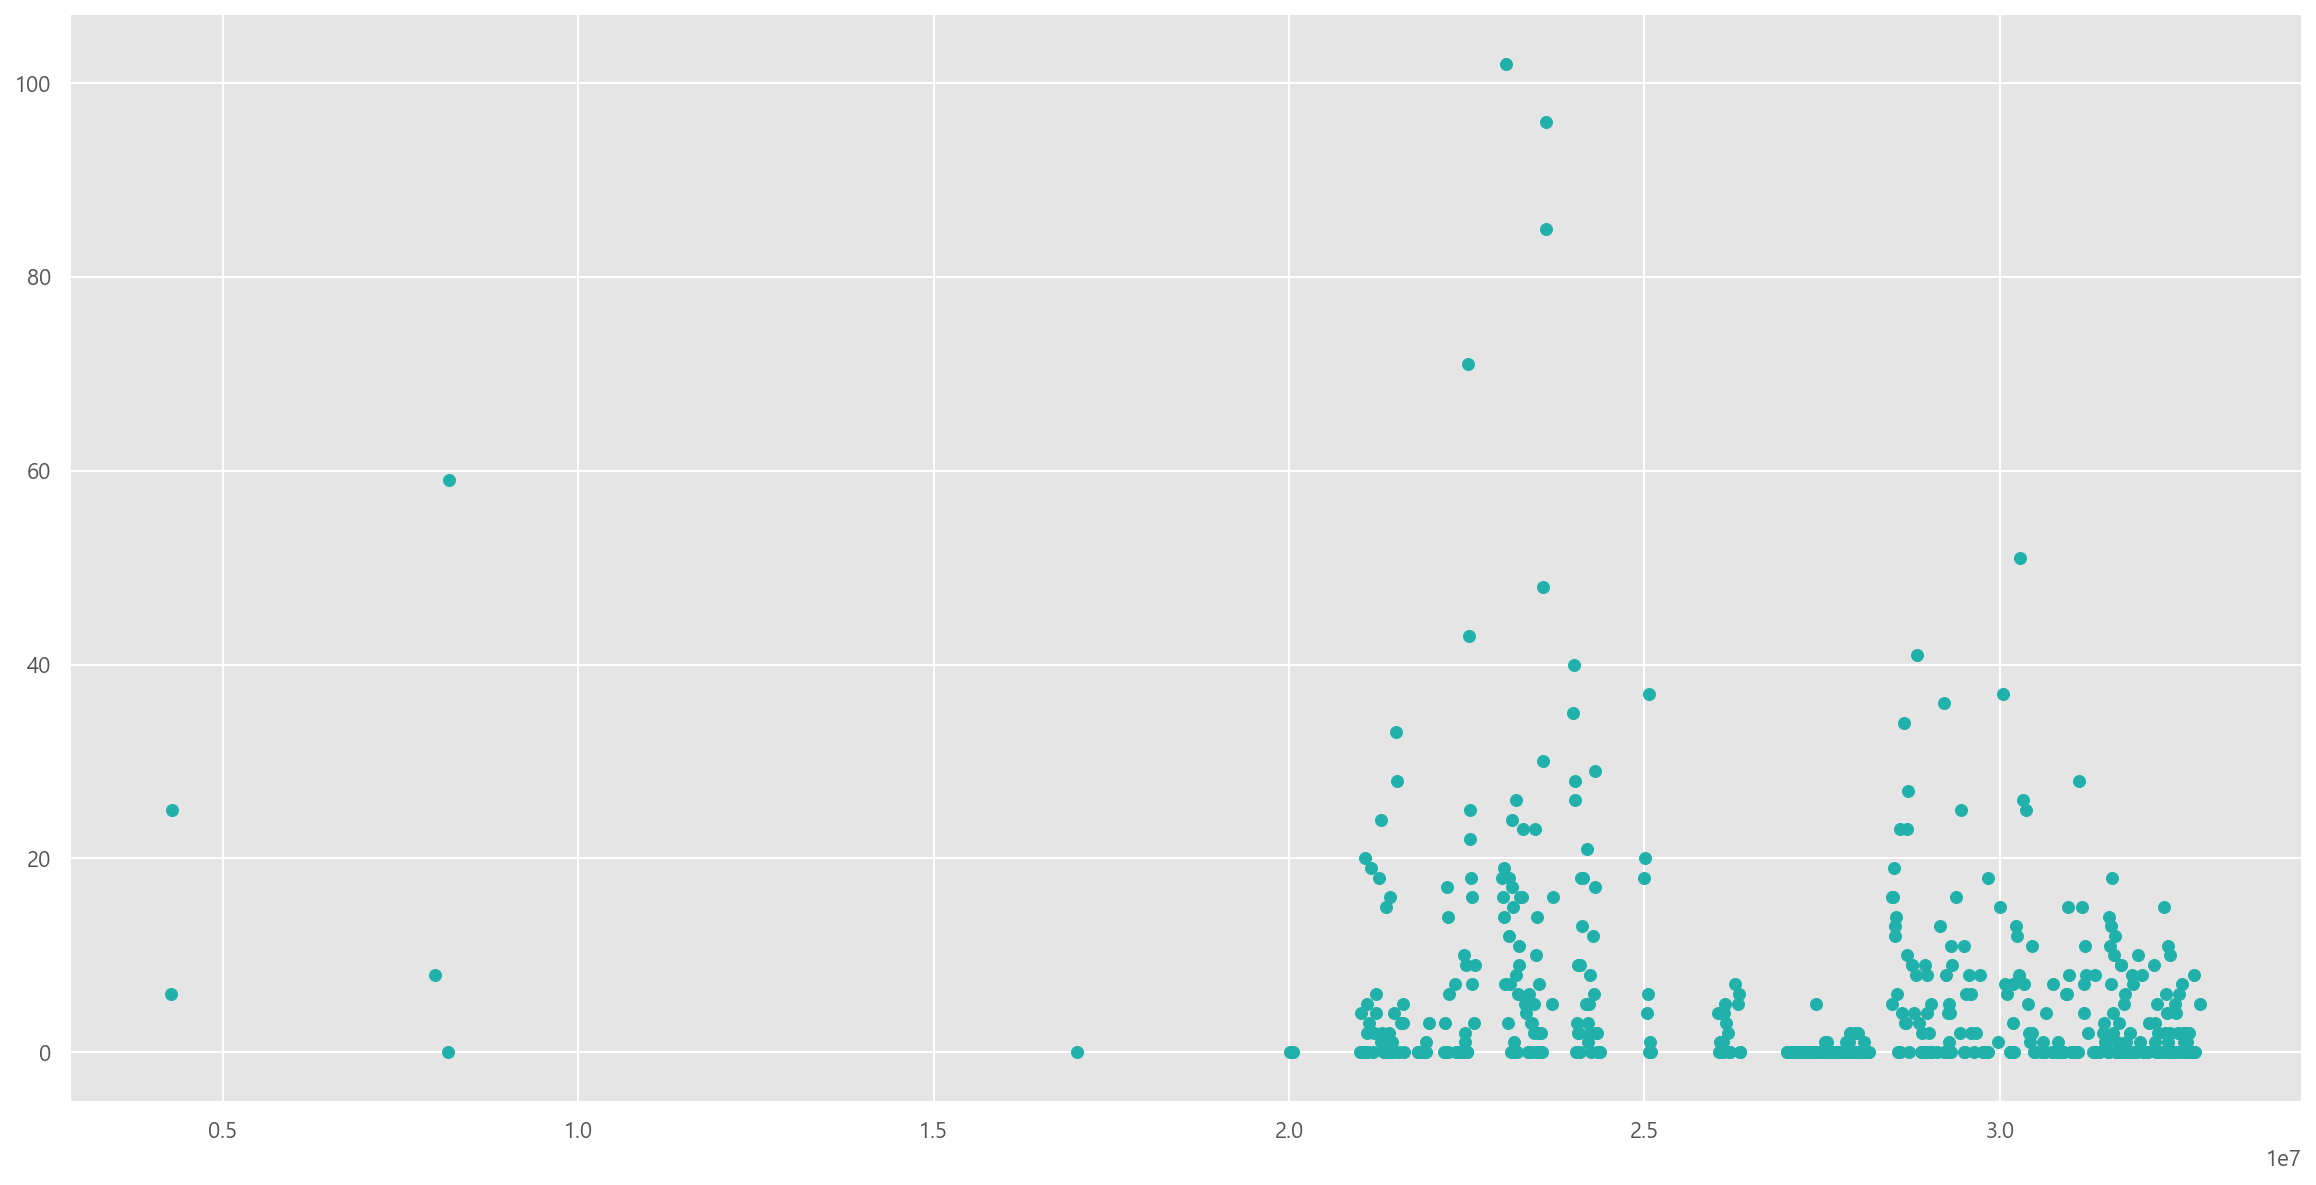

In [85]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])
plt.figure(figsize=(20,10))
plt.scatter(temp['bus_route_id'], temp['6~7_ride'], color='lightseagreen')

In [93]:
np.max(temp['6~7_ride'])

102.0

In [119]:
temp[temp['6~7_ride']==102]
# route_1 ÏäπÏ∞®ÏàòÍ∞Ä outlierÏûÑÏùÑ ÌôïÏù∏

bus_route_id        date  6~7_ride
2836      23050000  2019-09-12     102.0

In [ ]:
palette = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'darkorange', 'lime', \
                 'lightpink', 'chocolate', 'olivedrab', 'lightseagreen']

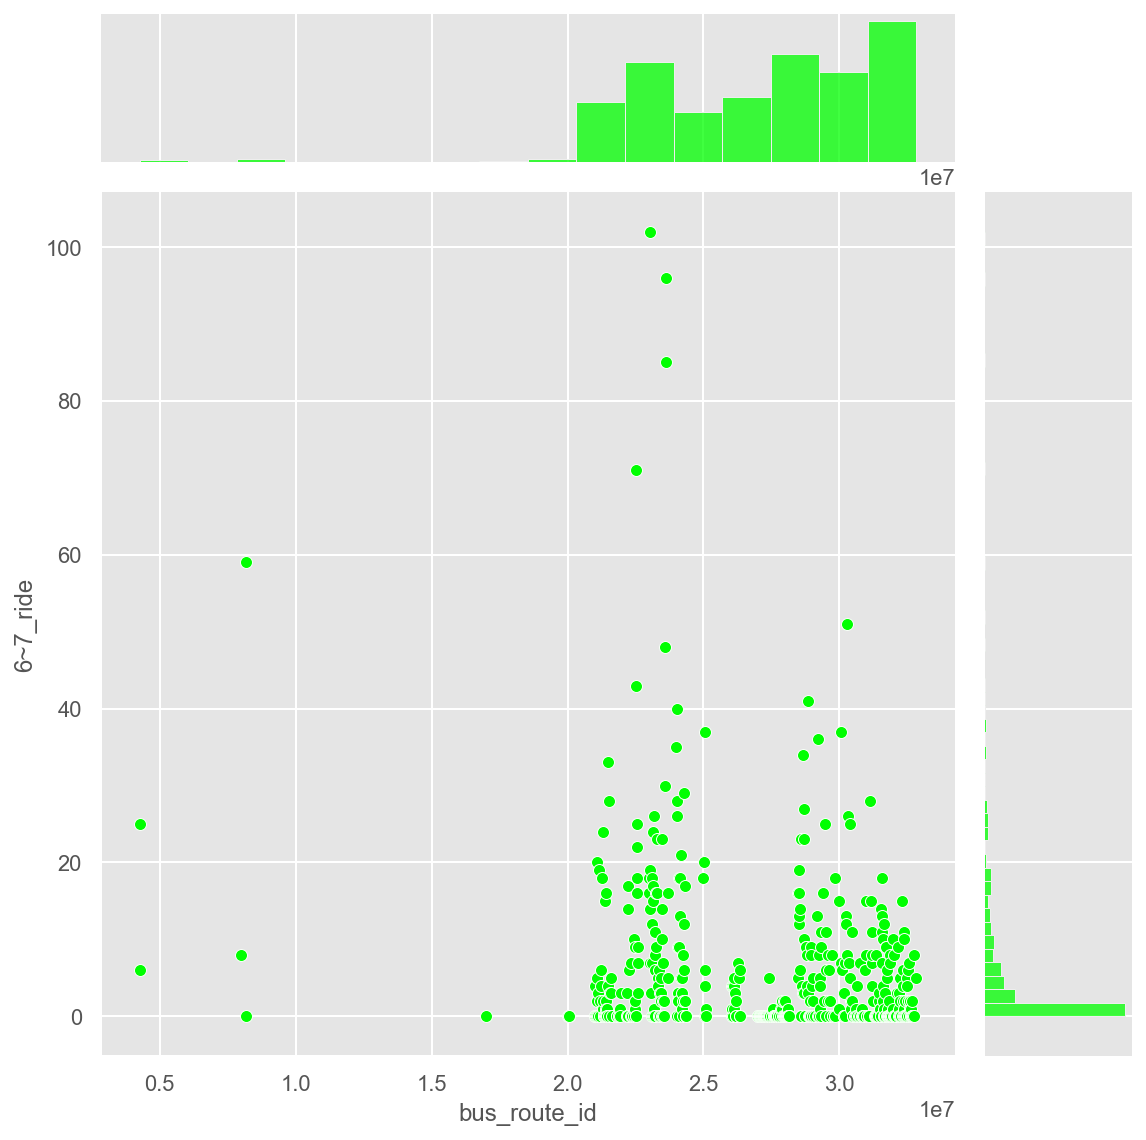

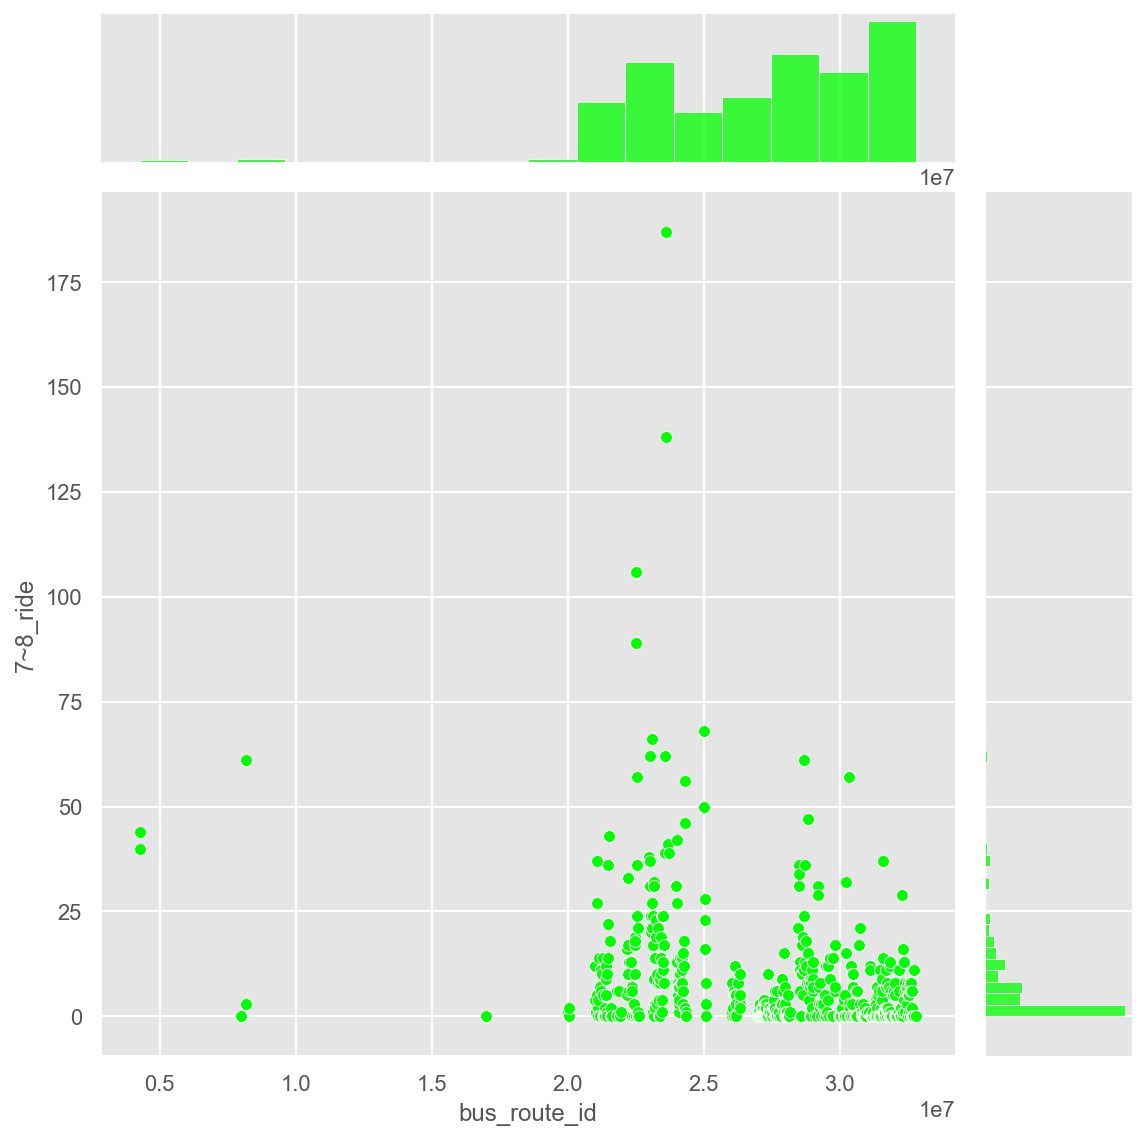

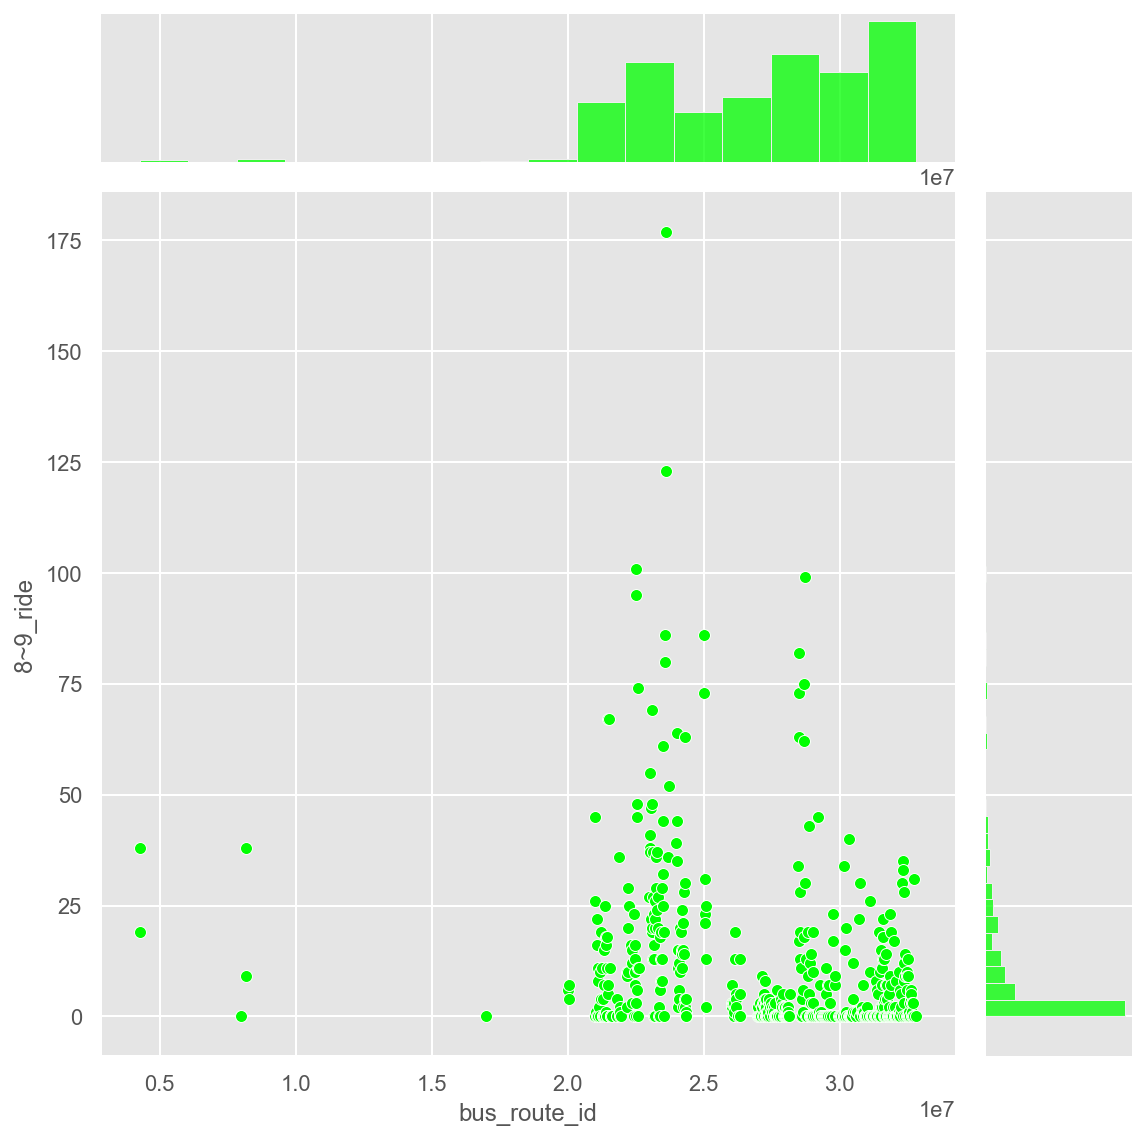

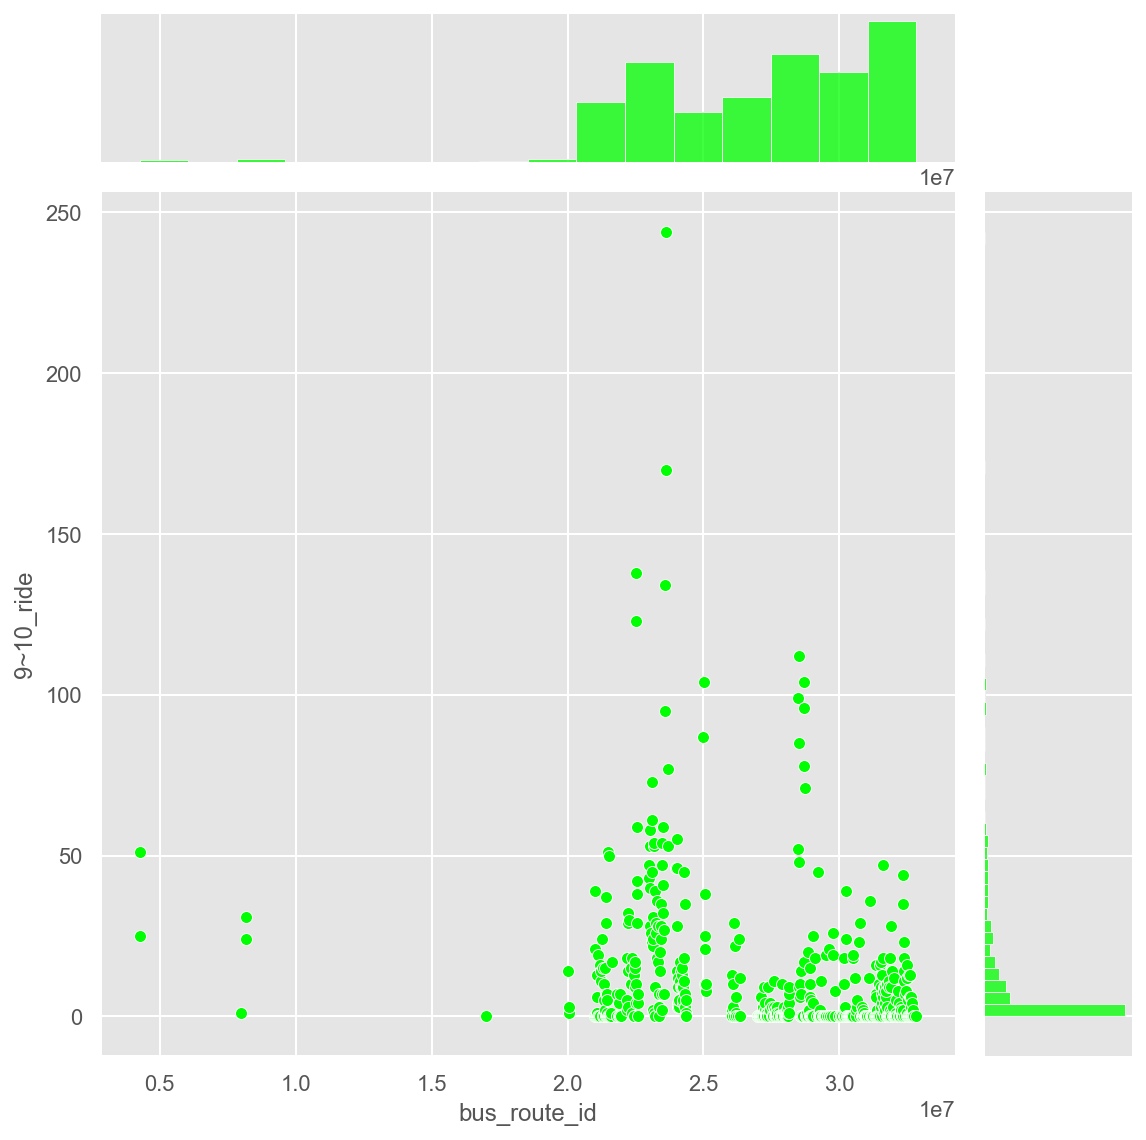

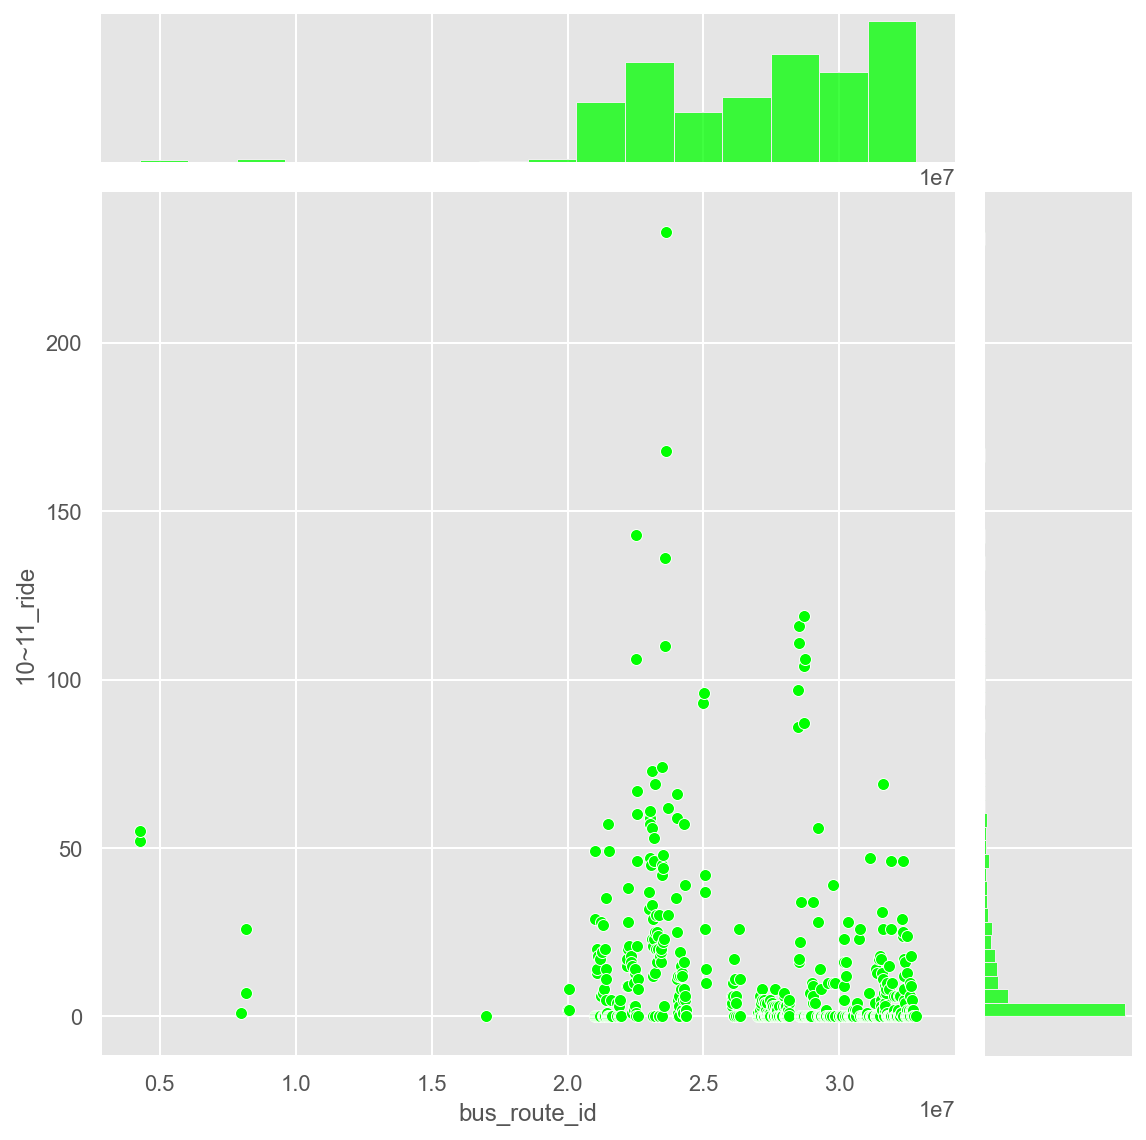

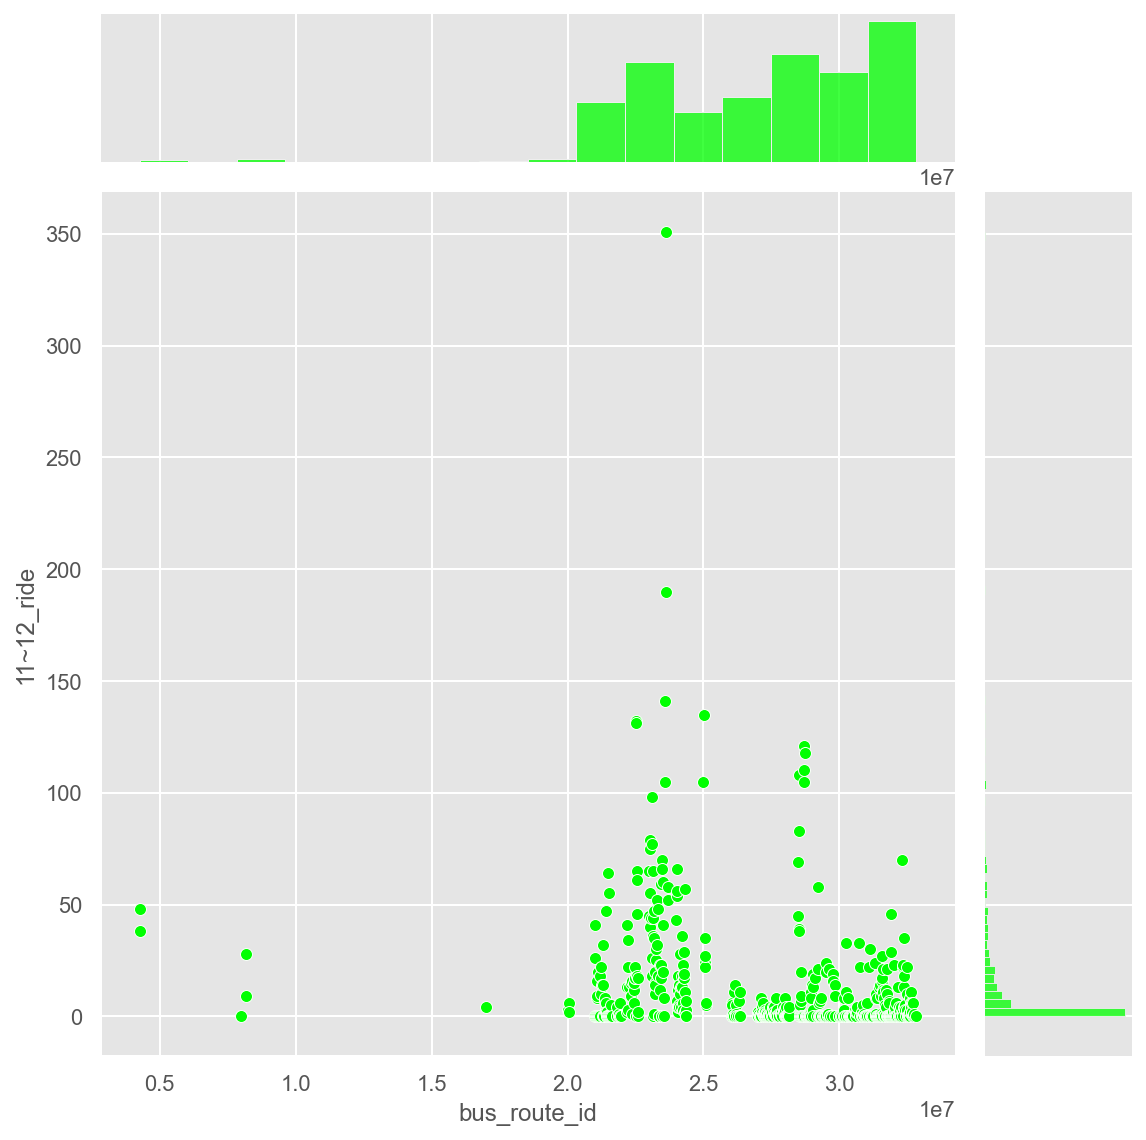

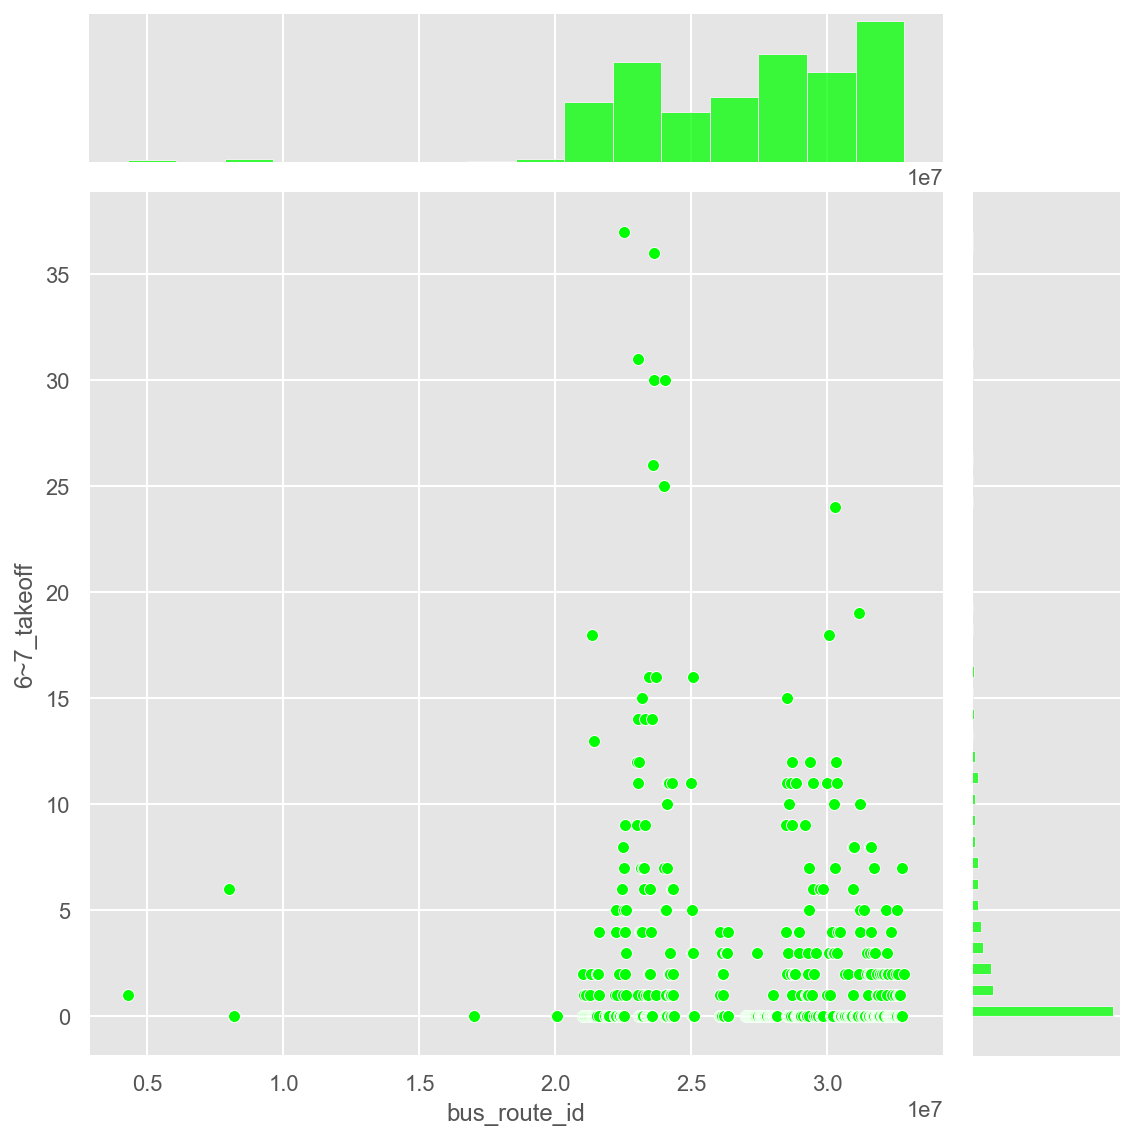

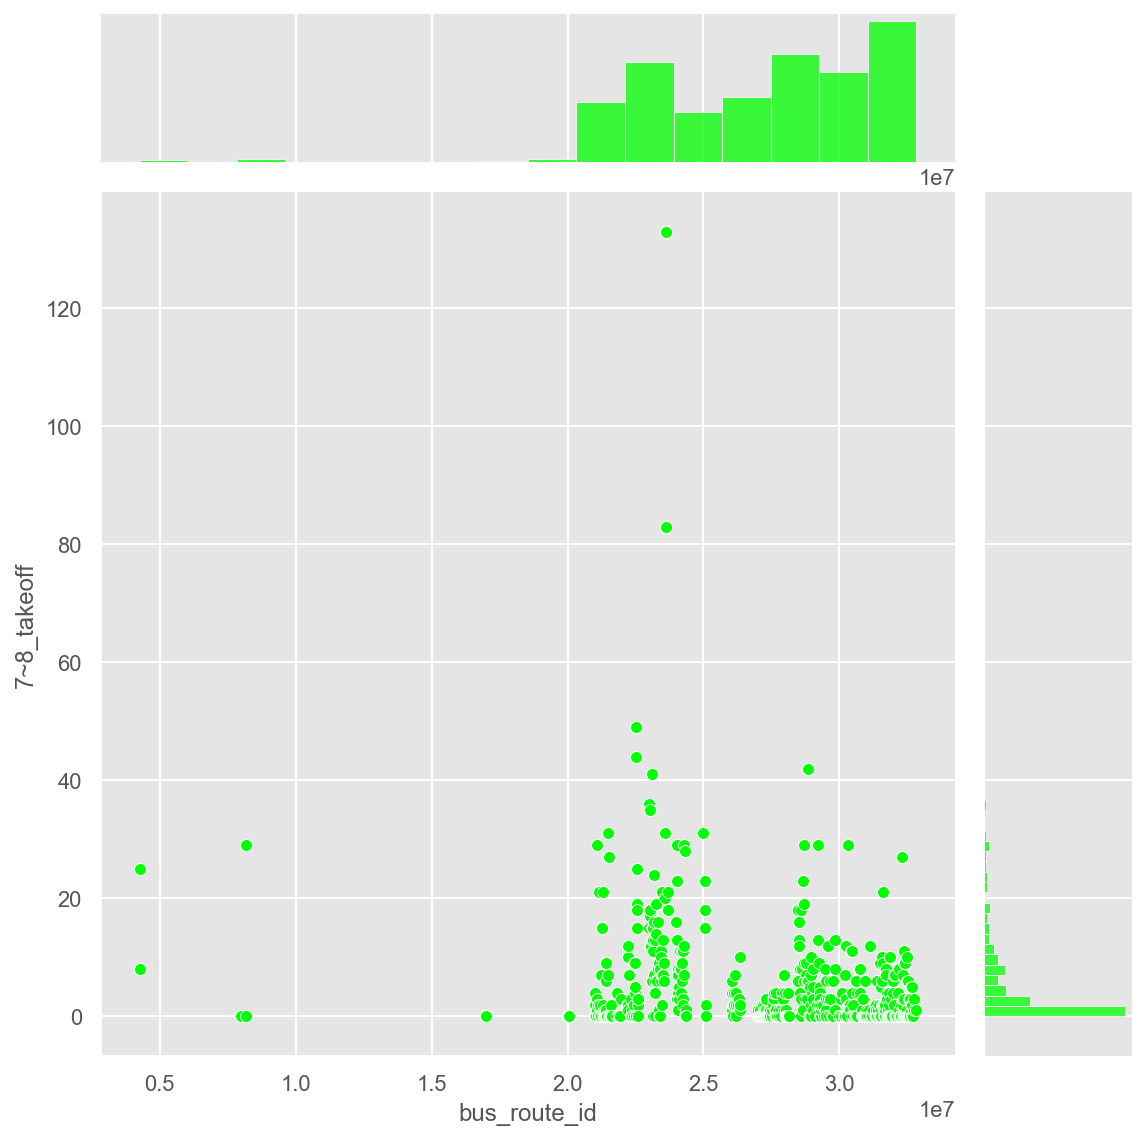

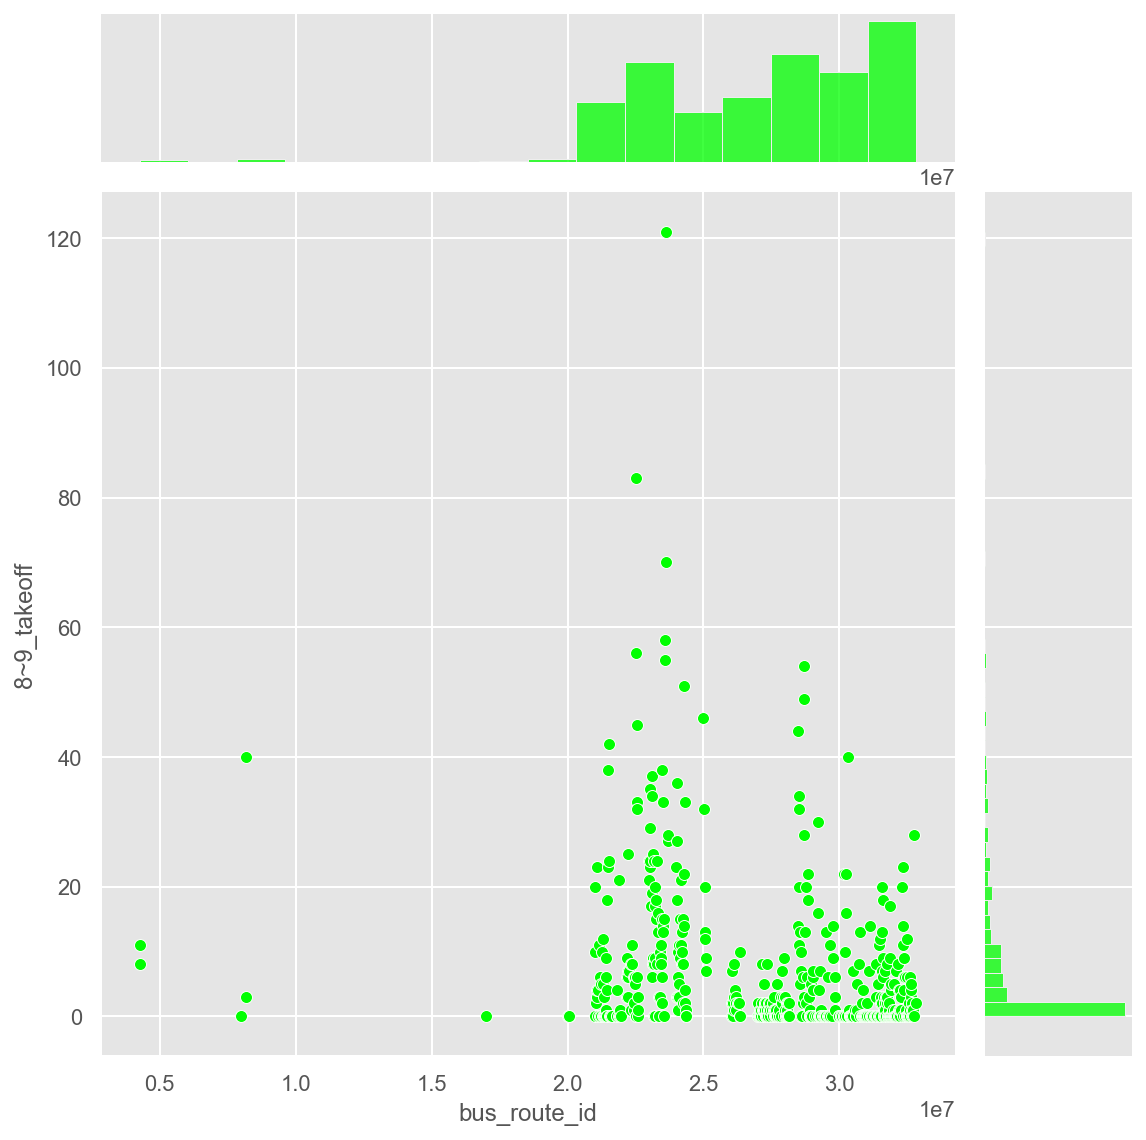

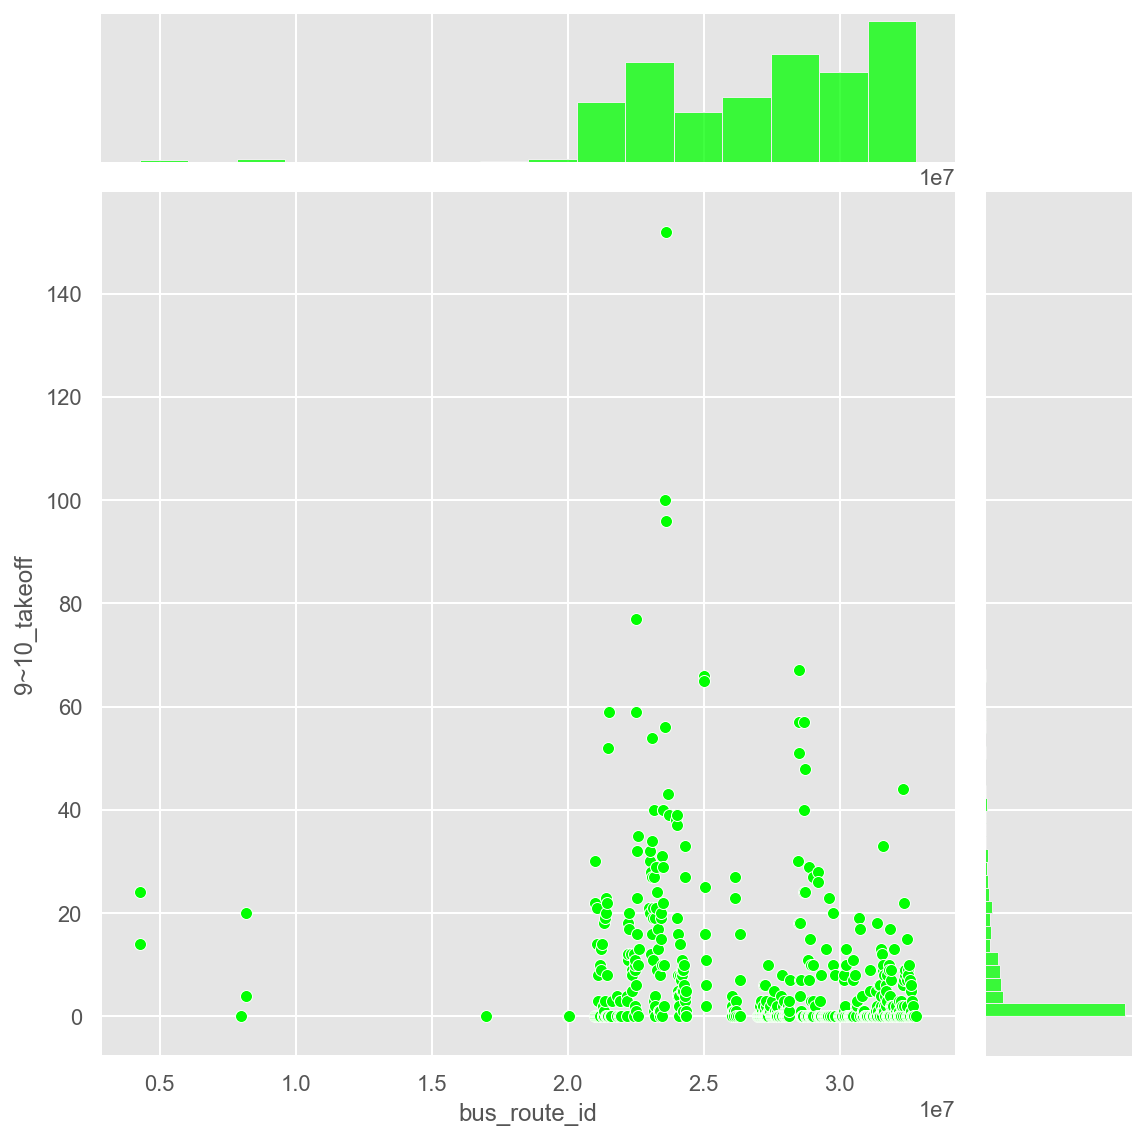

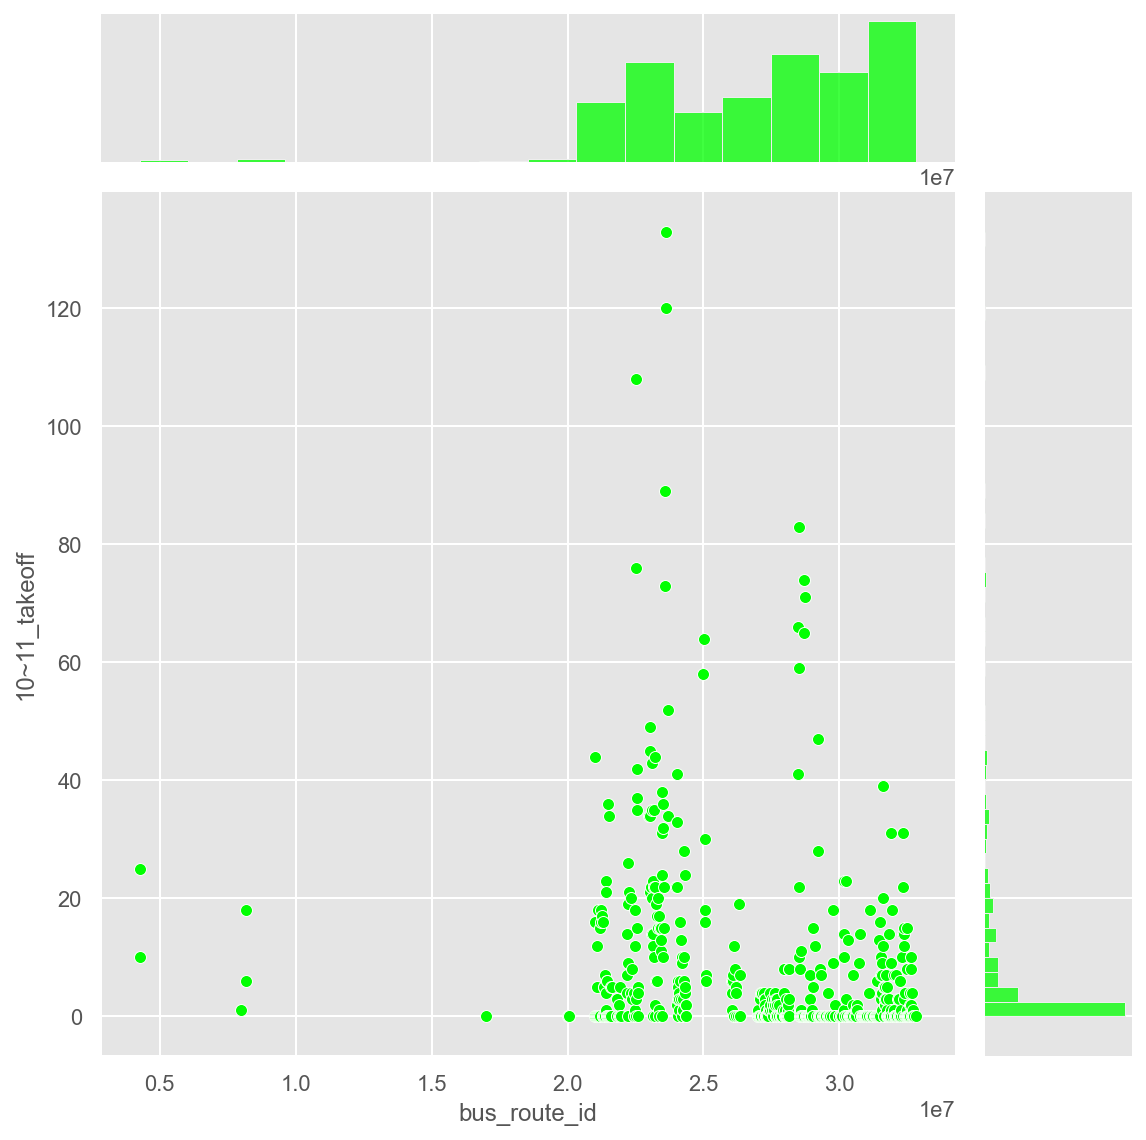

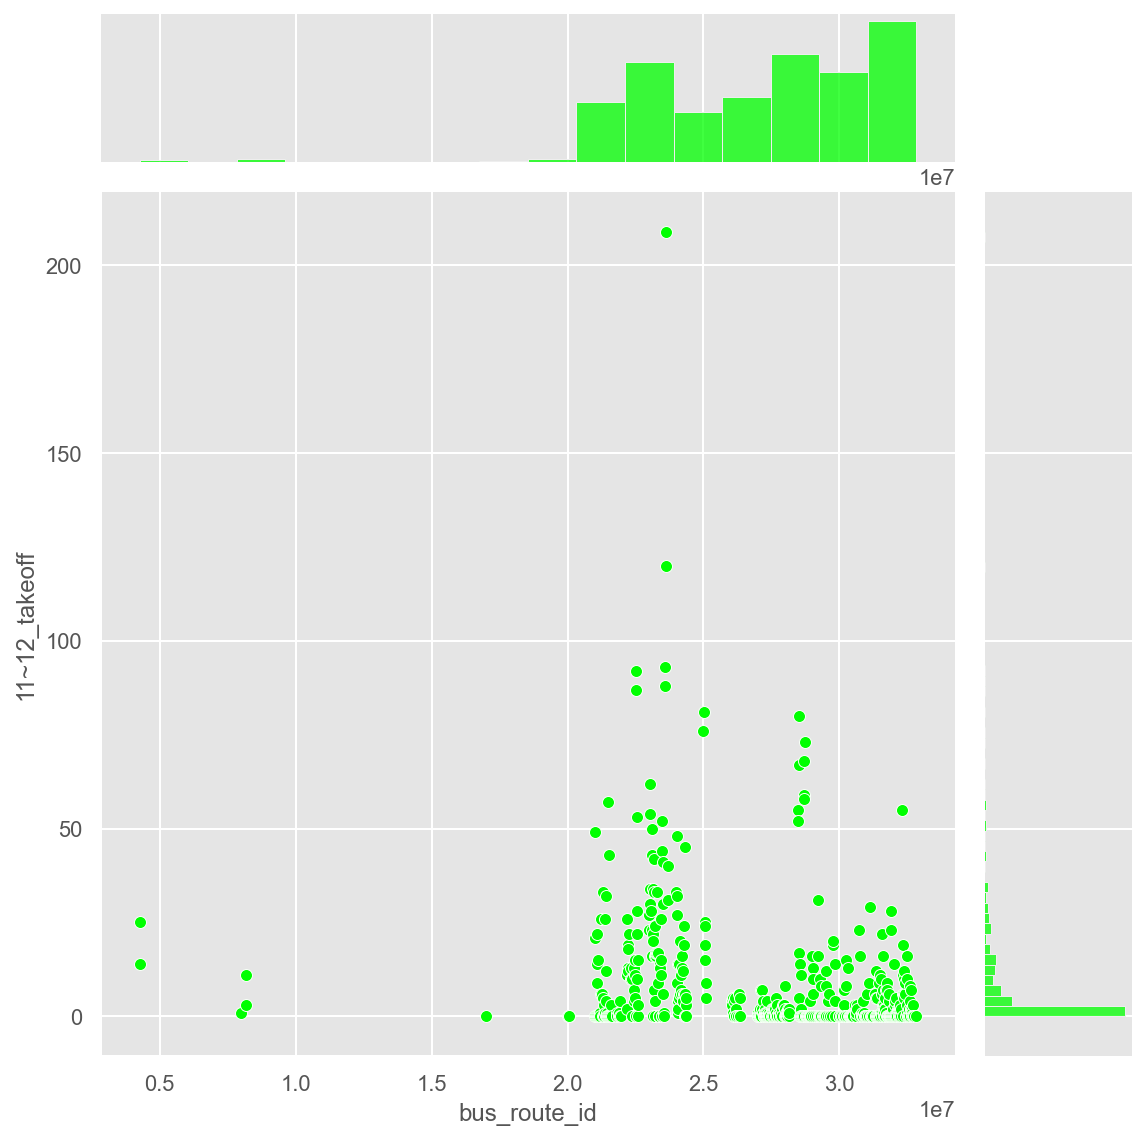

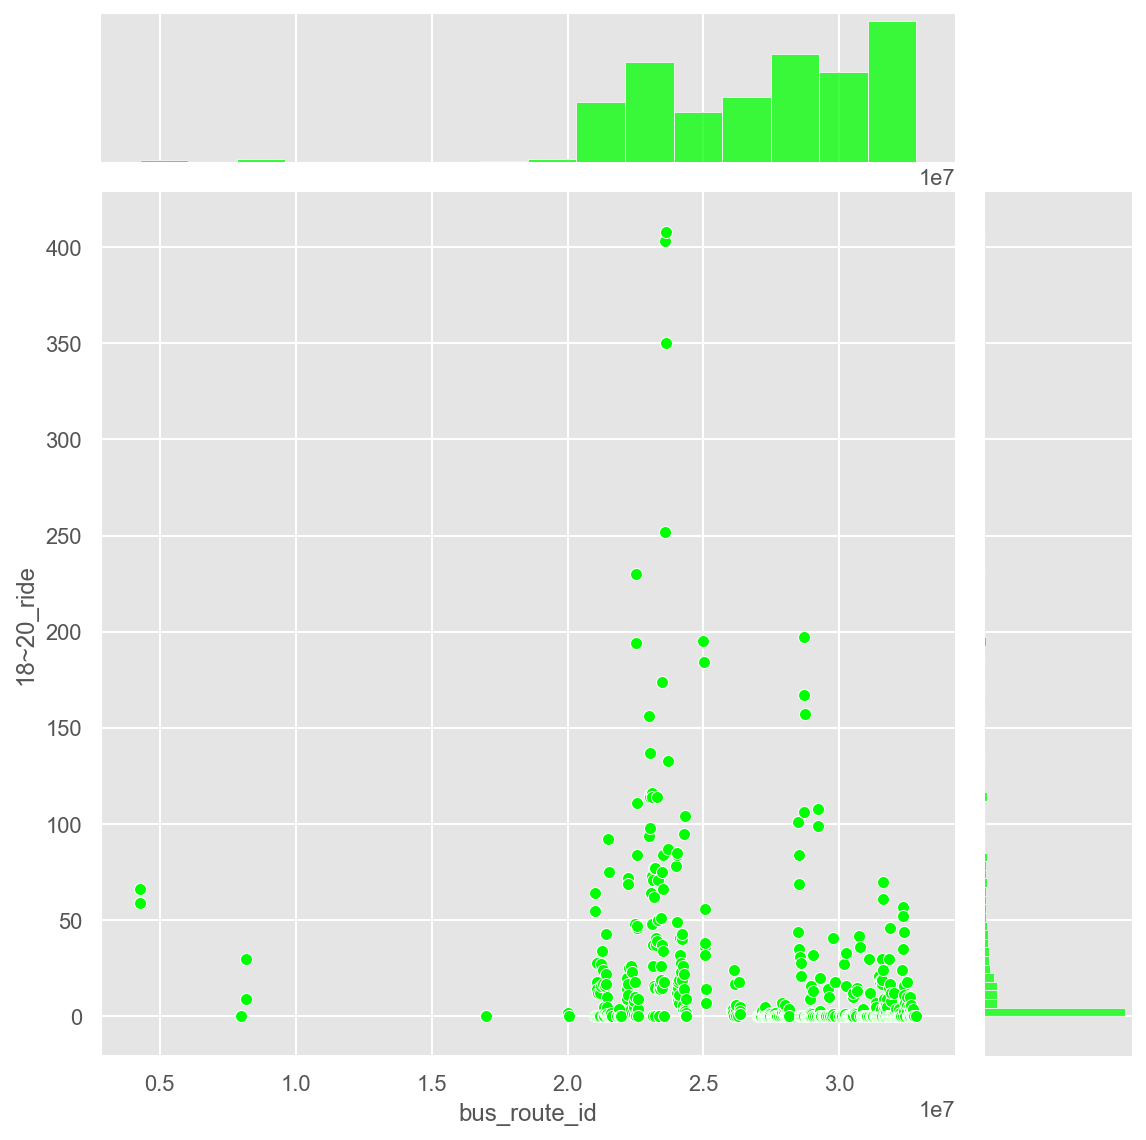

In [48]:
# ÌôïÏã§Ìûà jointplotÏù¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î∂ÑÌè¨Í∞Ä Ïñ¥ÎîîÏóê ÏßëÏ§ëÎêòÏñ¥ÏûàÎäîÏßÄ Îçî Ïûò Î≥¥Ïó¨Ï§ÄÎã§.
# 9Ïõî 12Ïùº ÎÖ∏ÏÑ†Î≥Ñ/ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïäπ,ÌïòÏ∞® Ïù∏ÏõêÏàò
import matplotlib.pyplot as plt

time = ['6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride',]
for each in time:
    sns.jointplot(x=temp['bus_route_id'], y=temp[each], height=8, color='lime')
    plt.show()

In [62]:
# ÎÖ∏ÏÑ†Î≥Ñ station Í∞ØÏàò!
temp_2 = df[['bus_route_id', 'station_code' ]].groupby(['bus_route_id'],).count()
temp_2

station_code
bus_route_id              
4270000                776
4280000                928
7990000                130
8170000                353
8180000                385
...                    ...
32740000              1007
32760000               237
32770000                23
32810000                61
32820000               160

[613 rows x 1 columns]

In [68]:
# ÎÖ∏ÏÑ†Î≤àÌò∏ 4270000 Í∏∞Ï§ÄÏúºÎ°ú station Í∞ØÏàòÍ∞Ä 776Í∞úÏù∏Îç∞, Ïó¨Í∏∞ÏÑú Ï§ëÎ≥µÏùÑ Ï†úÏô∏ÌïòÎ©¥ 38Í∞úÎ∞ñÏóê ÎêòÏßÄ ÏïäÎäîÎã§.
print(df[df['bus_route_id'] == 4270000]['station_code'].value_counts())
len(df[df['bus_route_id'] == 4270000]['station_code'].value_counts())

432     30
357     30
1726    30
2843    30
1579    30
2851    30
2494    30
2095    30
344     30
2014    30
2966    30
1660    29
1666    27
2009    27
1648    27
1646    26
2885    25
2094    25
3031    25
2013    24
2114    20
1662    19
1636    19
3173    19
2008    19
4154    18
1943    18
2697    16
2010    16
2699    14
2883    13
2012     8
2972     3
3584     3
2006     2
2021     2
2844     1
2111     1
Name: station_code, dtype: int64


38

In [75]:
# Ïã†Î¢∞ÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî ÌïòÏ∞® Ï†ïÎ≥¥ Ï†úÏô∏
passengers_rev = passengers.iloc[:,:6]
passengers_rev

6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  11~12_ride
route_1     102.0      20.0      47.0       28.0        57.0        40.0

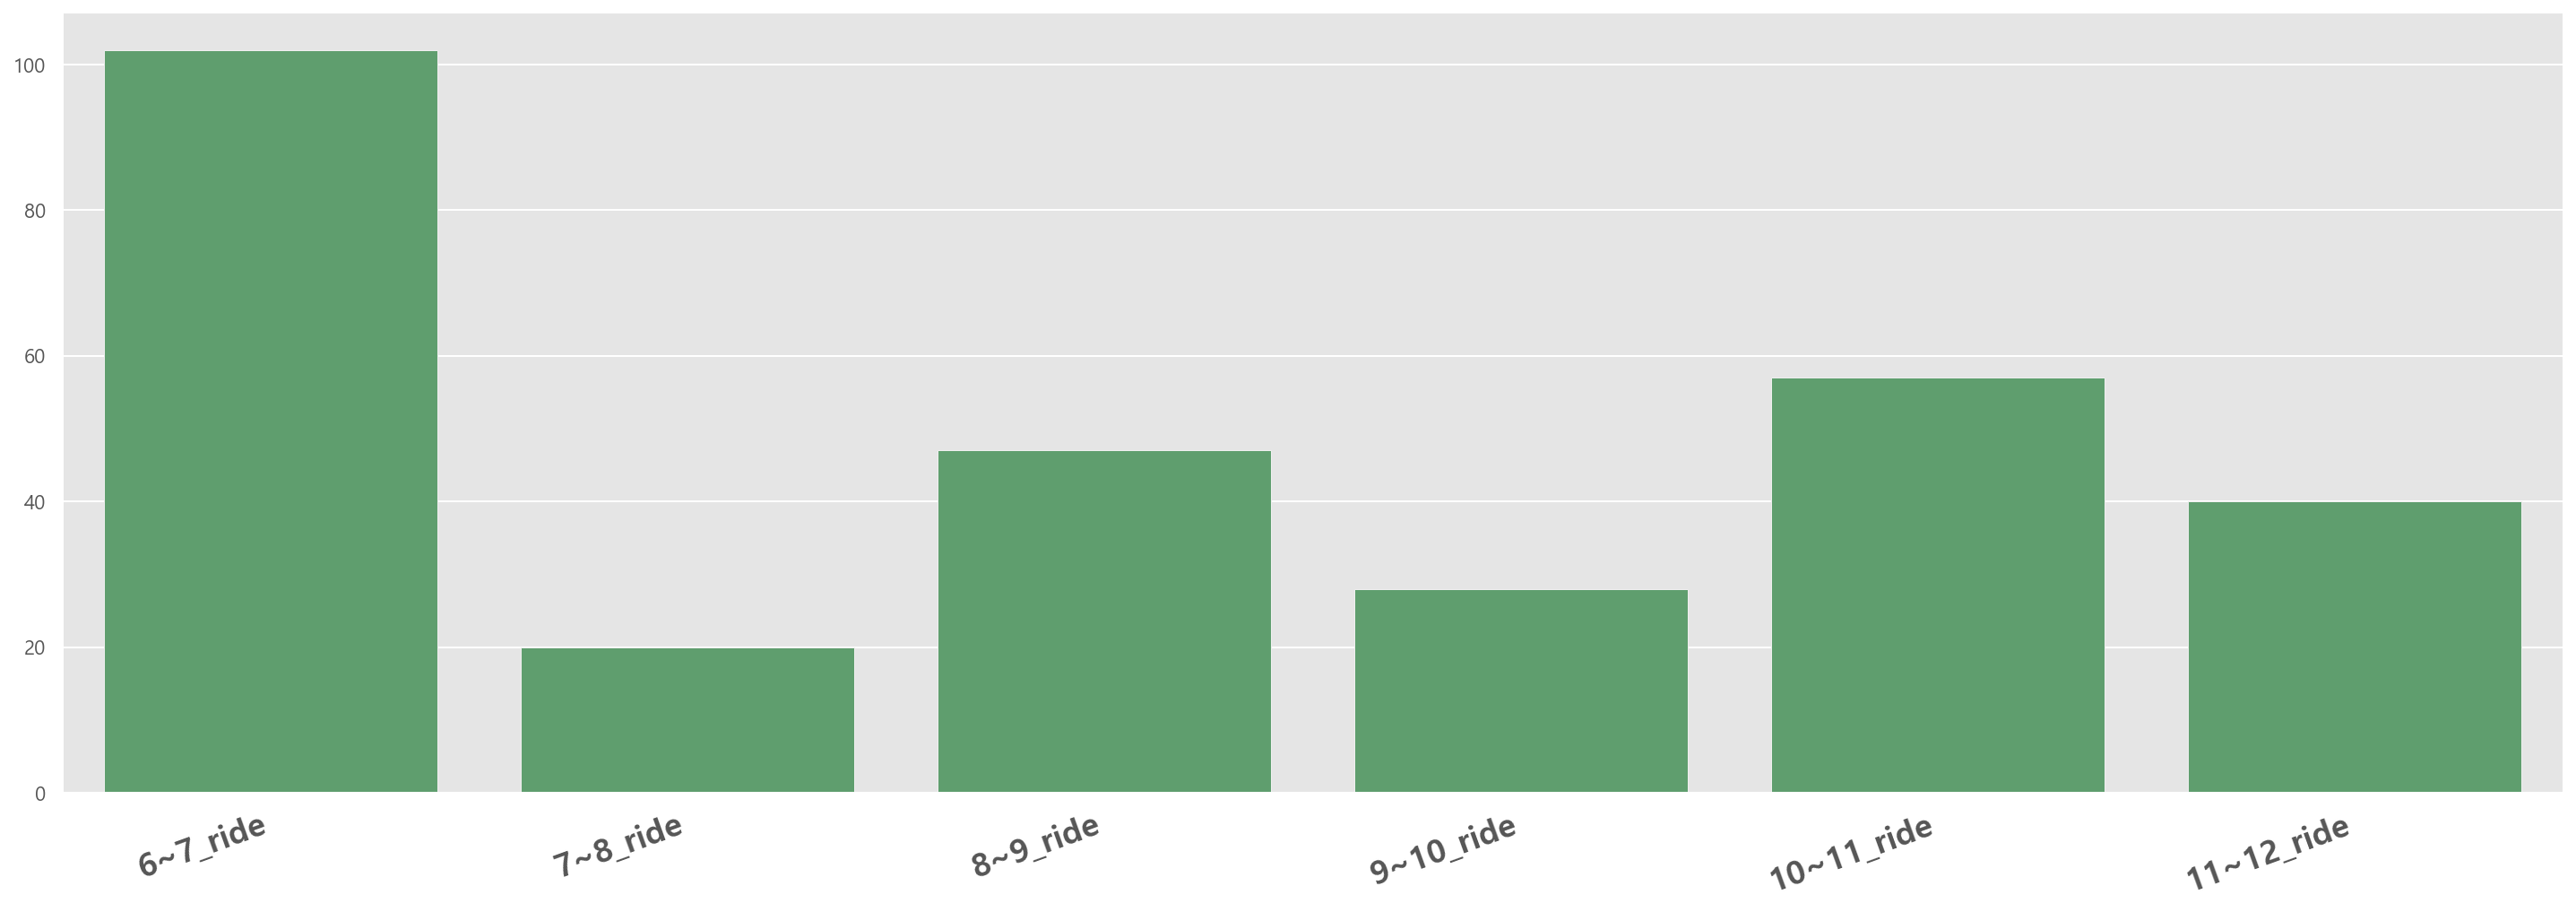

In [78]:
# Ïã†Î¢∞ÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî ÌïòÏ∞® Ï†ïÎ≥¥ Ï†úÏô∏
# Ìï¥Îãπ ÎÖ∏ÏÑ† ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏäπÏ∞® Ïù∏Ïõê
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.figure(figsize=(25,8))
barplot = sns.barplot(data=passengers_rev, color='g')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=20, 
                          horizontalalignment='right', size=18, weight='bold')
plt.show()

In [86]:
# Ïã†Î¢∞ÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî ÌïòÏ∞® Ï†ïÎ≥¥ Ï†úÏô∏
# Ï†ïÎ•òÏÜåÎ≥Ñ ÏäπÏ∞® Ïù∏Ïõê
time = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '18~20_ride', ]

dic_2 = {}
for idx, col in route_1.iterrows():
    keys = []
    values = []
    keys = col['station_name']
    print(keys)
    for each in time:
        values.append(col[each])
    dic_2[keys] = np.sum(values)
    print(dic_2)
    print('---')

Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0}
---
Ïò§Í¥ëÎ°úÏûÖÍµ¨
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0}
---
Ïù¥Ìò∏2Îèô
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0}
---
ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0, 'ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠': 12.0}
---
Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0, 'ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠': 12.0, 'Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê': 4.0}
---
ÎÇ¥ÎèÑÎèôÎèôÎßàÏùÑ
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0, 'ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠': 12.0, 'Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê': 4.0, 'ÎÇ¥ÎèÑÎèôÎèôÎßàÏùÑ': 0.0}
---
ÌòÑÏÇ¨ÎßàÏùÑ
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0, 'ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠': 12.0, 'Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê': 4.0, 'ÎÇ¥ÎèÑÎèôÎèôÎßàÏùÑ': 0.0, 'ÌòÑÏÇ¨ÎßàÏùÑ': 1.0}
---
ÌïòÍ∑ÄÏ¥àÎì±ÌïôÍµê
{'Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê': 80.0, 'Ïò§Í¥ëÎ°úÏûÖÍµ¨': 0.0, 'Ïù¥Ìò∏2Îèô': 2.0, 'ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠

In [88]:
pd.set_option('display.max_columns', 52)
psng_per_stat = pd.DataFrame([dic_2], index=['No of the Passenger'])
psng_per_stat

Íµ≠Ï†úÏó¨Í∞ùÏÑ†ÌÑ∞ÎØ∏ÎÑê  Ïò§Í¥ëÎ°úÏûÖÍµ¨  Ïù¥Ìò∏2Îèô  ÎÖ∏ÌòïÏö∞Ï≤¥Íµ≠  Ïô∏ÎèÑÏ¥àÎì±ÌïôÍµê  ÎÇ¥ÎèÑÎèôÎèôÎßàÏùÑ  ÌòÑÏÇ¨ÎßàÏùÑ  \
No of the Passenger      80.0    0.0   2.0   12.0     4.0     0.0   1.0   

                     ÌïòÍ∑ÄÏ¥àÎì±ÌïôÍµê  ÌïòÍ∑ÄÏö∞Ï≤¥Íµ≠  ÎÇ®Ï£ºÎèô  Ïô∏ÎèÑÎ∂ÄÏòÅ2Ï∞®ÏïÑÌååÌä∏  Ïö∞Î†πÏù¥ÎßàÏùÑ  Ï†úÏ£ºÎØºÏÜçÏò§ÏùºÏû•ÏûÖÍµ¨  ÏõîÎûëÏûÖÍµ¨  \
No of the Passenger     0.0    1.0  1.0        0.0    1.0        0.0   1.0   

                     Ï†úÏ£ºÏó∞ÏïàÏó¨Í∞ùÌÑ∞ÎØ∏ÎÑê  ÏÇ∞ÏßÄÎ≥ÄÏ†ÑÏÜå  Ïö©Ï≤úÎßàÏùÑ  Ï†úÏ£ºÎ≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê  ÌïúÍµ≠Î≥ëÏõê  Í¥ëÏñëÏÇ¨Í±∞Î¶¨  ÌôçÎûëÎ°úÏûÖÍµ¨  ÎèôÏÇ∞Íµê  \
No of the Passenger        6.0    6.0   4.0     16.0   4.0   11.0    0.0  1.0   

                     ÏùÄÎÇ®Îèô  ÎèÑÌò∏Îèô  Ï†ú4Î∂ÄÎëê  ÏÇºÏÑ±Ï¥àÎì±ÌïôÍµê   Í¥ëÏñë  ÎèôÎ¨∏Î°úÌÑ∞Î¶¨(ÎèôÎ¨∏ÏãúÏû•)  Ï§ëÏïôÎ°ú(Ï§ëÏïôÏÑ±Îãπ)  \
No of the Passenger  8.0  7.0   5.0     4.0  3.0         32.0       21.0   

                     ÏãúÎØºÌöåÍ¥Ä  Ïö©Î¨∏ÎßàÏùÑÌöåÍ¥Ä  Ïö©Î¨∏ÎßàÏùÑ  Ïö©Îã¥1ÎèôÏ£ºÎØºÏÑºÌÑ∞  Ïó∞ÎèôÏ£ºÎØºÏÑºÌÑ∞  Ï†úÏ£ºÎèÑÏ≤≠Ïã†Ï†úÏ£ºÎ°úÌÑ∞Î¶¨  Í¥ÄÎçïÏ†ï  \
No of the Passenger   8.0     0.0   0.0       0.0     4.0         9.0  0.0   

                     ÏõîÏÑ±ÎßàÏùÑÌöåÍ¥Ä  ÏõîÍ¥ëÎ°ú   Í¥ëÌèâ  ÏÇºÏñëÏ¢ÖÏ†ê  Ï†ïÎì†ÎßàÏùÑ  Ïó∞ÎèôÏûÖÍµ¨  ÎåÄÎèôÎßàÏùÑ  Ïô∏ÎèÑÎ∂ÄÏòÅ1Ï∞®ÏïÑÌååÌä∏  \
No of the Passenger     3.0  1.0  2.0   0.0   5.0   0.0   0.0        1.0   

                     Ï†úÏ£ºÍµ≠Ï†úÍ≥µÌï≠(Ïã†Ï†úÏ£ºÎ∞©Î©¥)  ÌïòÍ∑ÄÌú¥Î®ºÏãúÏïÑ1Îã®ÏßÄ  Î©îÏ¢ÖÍ∏ÄÎûòÎìúÏ†úÏ£º  ÏõêÎÖ∏Ìòï  ÌïòÍ∑ÄÌïòÎÇòÎ°úÎßàÌä∏  Ï†ú6Î∂ÄÎëê  \
No of the Passenger           35.0        2.0     12.0  6.0      3.0  85.0   

                     ÌÉêÎùºÍ¥ëÏû•  ÍπÄÎßåÎçïÍ∏∞ÎÖêÍ¥Ä  
No of the Passenger   0.0     1.0

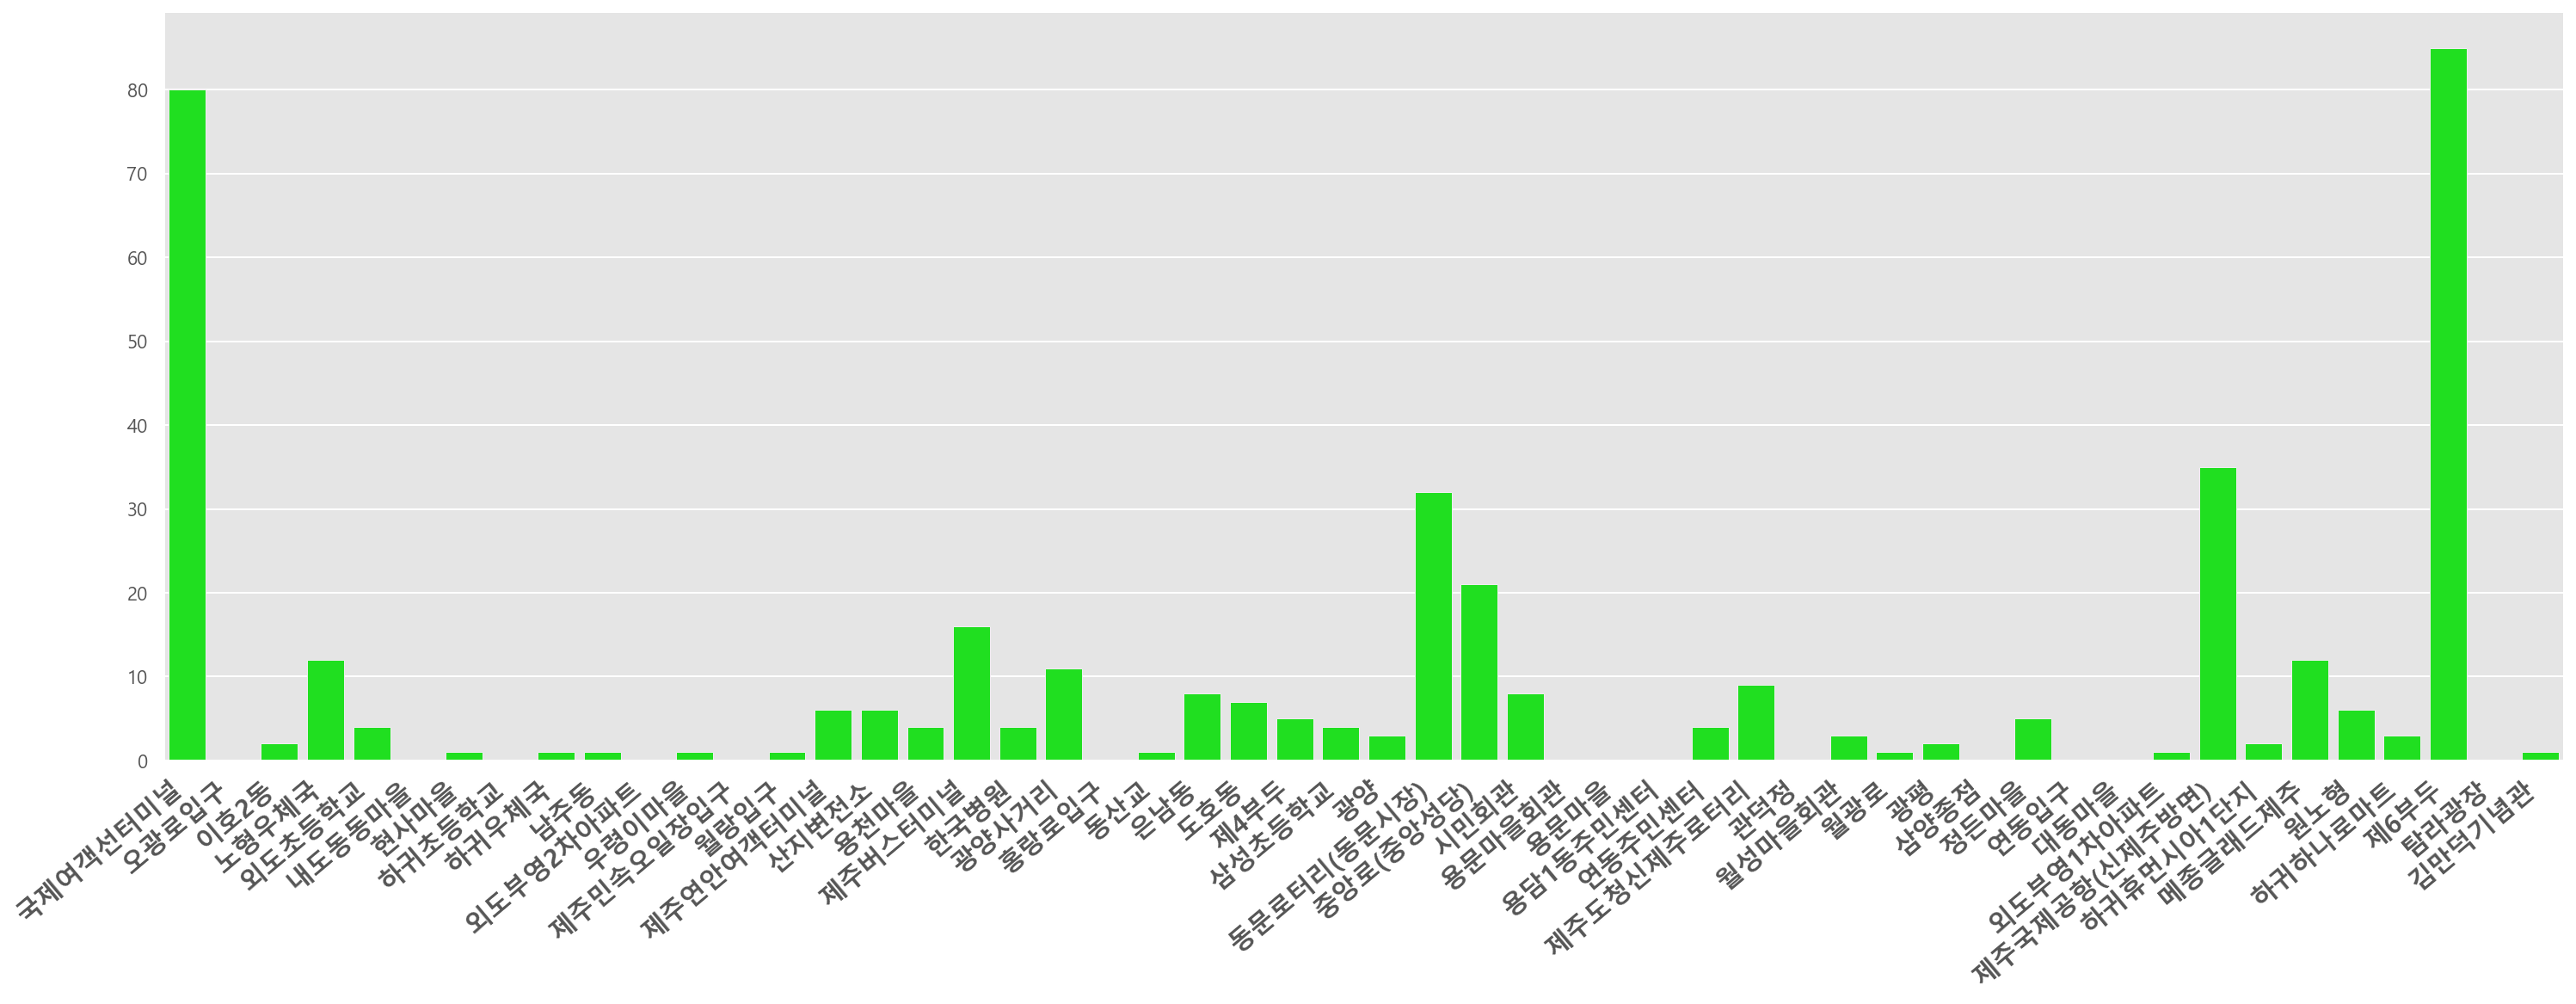

In [91]:
# Ïã†Î¢∞ÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÄÎäî ÌïòÏ∞® Ï†ïÎ≥¥ Ï†úÏô∏
# Ï†ïÎ•òÏÜåÎ≥Ñ ÏäπÏ∞® Ïù∏Ïõê
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.figure(figsize=(25,8))
barplot = sns.barplot(data=psng_per_stat, color='lime')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, 
                          horizontalalignment='right', size=15, weight='bold')
plt.show()

In [107]:
# 9Ïõî 12Ïùº 23050000ÎÖ∏ÏÑ†Ïùò Ï¥ù ÏäπÍ∞ùÏàò
np.sum(psng_per_stat.loc['No of the Passenger'])

408.0

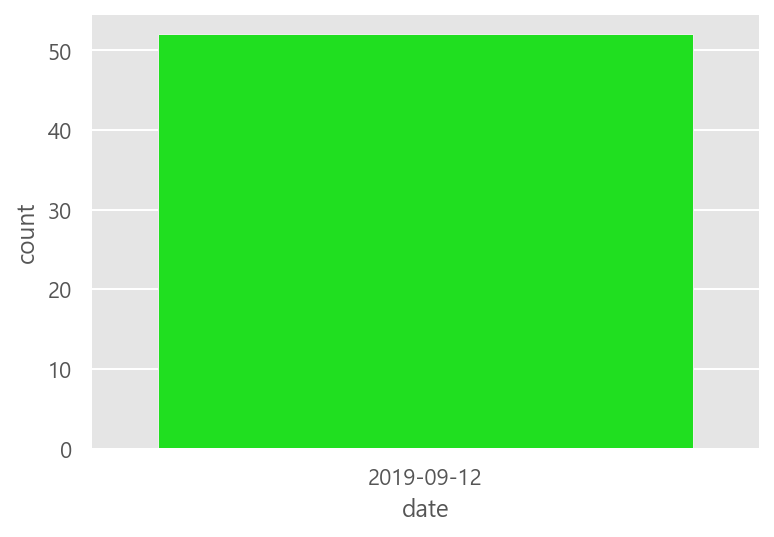

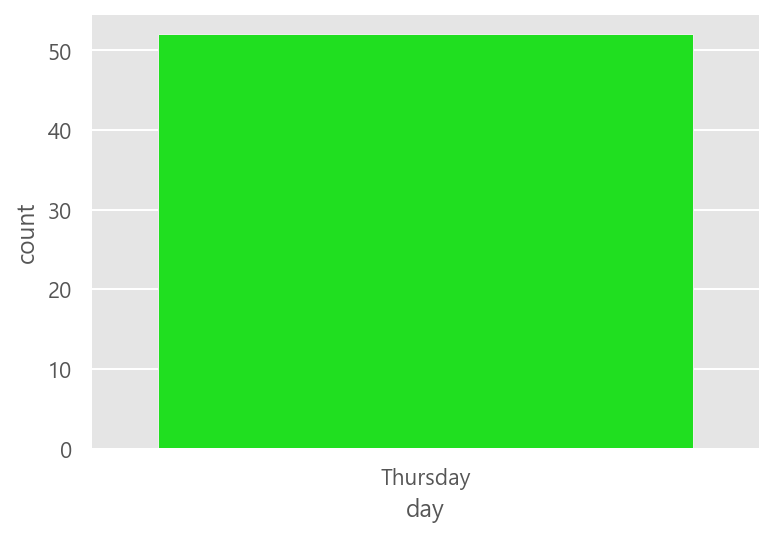

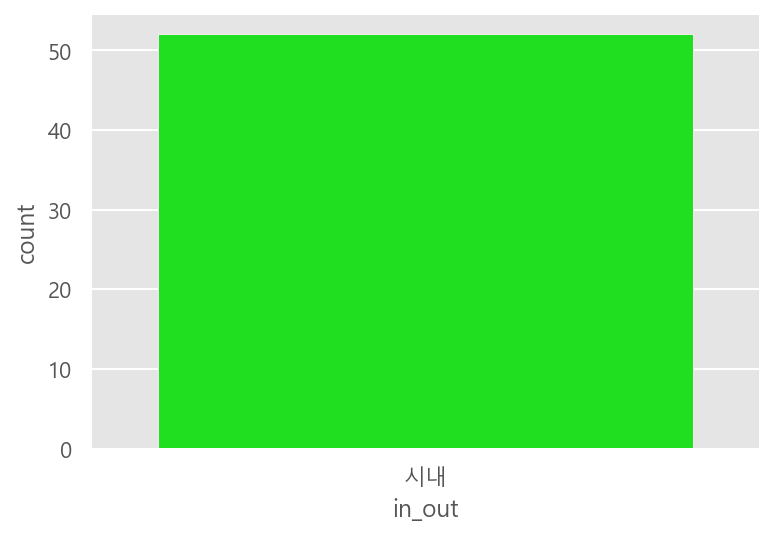

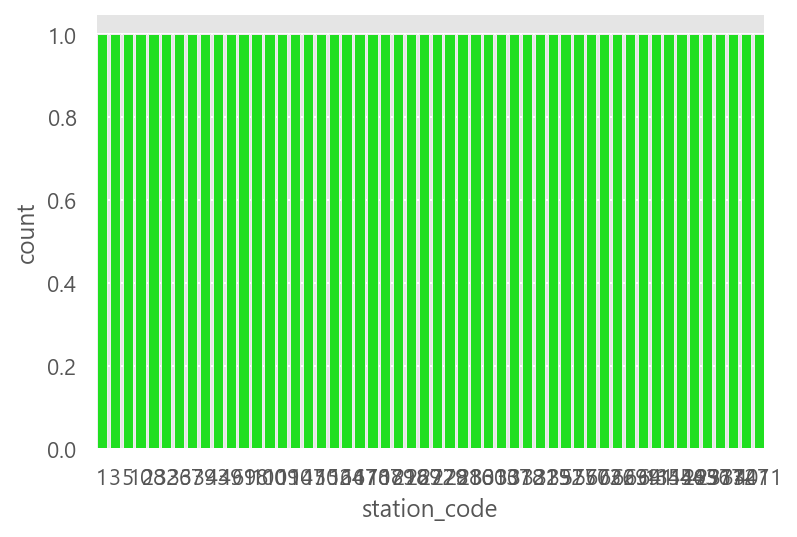

In [94]:
# 9Ïõî 12Ïùº 23050000ÎÖ∏ÏÑ†Ïùò Ïö¥ÌñâÏùºÏßÄ ÎîîÌÖåÏùº
# columnÎ≥ÑÎ°ú value_count
col = ['date', 'day', 'in_out', 'station_code', ]
for each in col:
    sns.countplot(x=each, data=route_1, color='lime')
    plt.show()
# Ìï¥Îãπ ÎÖ∏ÏÑ†ÏùÄ Ïù¥Îü∞ ÌäπÏßïÏùÑ Í∞ÄÏßÑÎã§.
# 52Í∞úÏùò Îç∞Ïù¥ÌÑ∞(rows)Í∞Ä ÏûàÎã§. 
# ÏãúÎÇ¥Î≤ÑÏä§ only
# Ï†ïÎ•òÏÜåÎßàÎã§ 1Î≤àÏî©Îßå Ïö¥ÌñâÎêú Ï†ïÎ≥¥ ÏûàÎã§. 
# Ï¥ù 408Î™ÖÏùò ÏäπÍ∞ùÏù¥ ÏäπÏ∞®ÌñàÎã§.